In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import statsmodels.api as sm
#import mplcursors
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

plt.style.use('seaborn-darkgrid')

In [2]:
HPSCapDF = pd.read_csv('COVID_HPSCapita.csv', index_col = 0)
HPSCapDF.head()

,State,cases,deaths,Personal Health Care Expenses Per State Capita (2014),Hospital Services Expenses Per State Capita (2014),Physician and Clinical Services Expenses Per State Capita (2014),Other Professional Services Expenses Per State Capita (2014),Home Health Care Expenses Per State Capita (2014),Drugs and Non-Durables Expenses Per State Capita (2014),Durables Expenses Per State Capita (2014),Other Health Care Expenses Per State Capita (2014),Total Health Care Expenses Per State Capita (2014)
0,Alabama,387786,14345,7281.0,2625.0,1739.0,170.0,202.0,1407.0,142.0,324.0,13890.0
1,Alaska,18316,367,11064.0,4715.0,3368.0,465.0,195.0,640.0,139.0,797.0,21383.0
2,Arizona,426614,18857,6452.0,2337.0,1774.0,248.0,136.0,814.0,175.0,347.0,12283.0
3,Arkansas,161569,3301,7408.0,2673.0,1635.0,262.0,181.0,1169.0,104.0,635.0,14067.0
4,California,2664110,102387,7549.0,2753.0,1983.0,217.0,291.0,955.0,97.0,495.0,14340.0


In [3]:
HPSCapDF.shape

(51, 12)

In [4]:
HPSCapDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   State                                                             51 non-null     object 
 1   cases                                                             51 non-null     int64  
 2   deaths                                                            51 non-null     int64  
 3   Personal Health Care Expenses Per State Capita (2014)             51 non-null     float64
 4   Hospital Services Expenses Per State Capita (2014)                51 non-null     float64
 5   Physician and Clinical Services Expenses Per State Capita (2014)  51 non-null     float64
 6   Other Professional Services Expenses Per State Capita (2014)      51 non-null     float64
 7   Home Health Care Expenses Per State C

In [5]:
HPSCapDF.isnull().sum()

State                                                               0
cases                                                               0
deaths                                                              0
Personal Health Care Expenses Per State Capita (2014)               0
Hospital Services Expenses Per State Capita (2014)                  0
Physician and Clinical Services Expenses Per State Capita (2014)    0
Other Professional Services Expenses Per State Capita (2014)        0
Home Health Care Expenses Per State Capita (2014)                   0
Drugs and Non-Durables Expenses Per State Capita (2014)             0
Durables Expenses Per State Capita (2014)                           0
Other Health Care Expenses Per State Capita (2014)                  0
Total Health Care Expenses Per State Capita (2014)                  0
dtype: int64

In [6]:
HPSCapDF.count()

State                                                               51
cases                                                               51
deaths                                                              51
Personal Health Care Expenses Per State Capita (2014)               51
Hospital Services Expenses Per State Capita (2014)                  51
Physician and Clinical Services Expenses Per State Capita (2014)    51
Other Professional Services Expenses Per State Capita (2014)        51
Home Health Care Expenses Per State Capita (2014)                   51
Drugs and Non-Durables Expenses Per State Capita (2014)             51
Durables Expenses Per State Capita (2014)                           51
Other Health Care Expenses Per State Capita (2014)                  51
Total Health Care Expenses Per State Capita (2014)                  51
dtype: int64

In [7]:
HPSCapDF.describe()

,cases,deaths,Personal Health Care Expenses Per State Capita (2014),Hospital Services Expenses Per State Capita (2014),Physician and Clinical Services Expenses Per State Capita (2014),Other Professional Services Expenses Per State Capita (2014),Home Health Care Expenses Per State Capita (2014),Drugs and Non-Durables Expenses Per State Capita (2014),Durables Expenses Per State Capita (2014),Other Health Care Expenses Per State Capita (2014),Total Health Care Expenses Per State Capita (2014)
count,5.100000e+01,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,1.056306e+06,5.861198e+04,8332.156863,3330.019608,1859.470588,272.470588,233.313725,1105.019608,149.627451,519.196078,15801.274510
std,2.249183e+06,1.579360e+05,1256.751246,651.431546,326.080196,54.599763,118.837282,213.644798,33.781629,229.288815,2388.675491
min,1.831600e+04,2.810000e+02,5982.000000,2337.000000,1319.000000,170.000000,72.000000,640.000000,97.000000,174.000000,11358.000000
25%,1.696980e+05,4.021000e+03,7390.000000,2845.500000,1671.000000,230.500000,171.500000,955.000000,129.000000,356.500000,14056.000000
50%,3.877860e+05,1.425100e+04,8107.000000,3256.000000,1779.000000,264.000000,212.000000,1148.000000,142.000000,452.000000,15386.000000
75%,1.047118e+06,5.046050e+04,9095.500000,3677.500000,1944.500000,305.500000,255.500000,1235.000000,165.000000,672.500000,17150.500000
max,1.504181e+07,1.081194e+06,11944.000000,5233.000000,3368.000000,465.000000,667.000000,1525.000000,273.000000,1100.000000,22895.000000


In [8]:
corr = HPSCapDF.corr()
corr

,cases,deaths,Personal Health Care Expenses Per State Capita (2014),Hospital Services Expenses Per State Capita (2014),Physician and Clinical Services Expenses Per State Capita (2014),Other Professional Services Expenses Per State Capita (2014),Home Health Care Expenses Per State Capita (2014),Drugs and Non-Durables Expenses Per State Capita (2014),Durables Expenses Per State Capita (2014),Other Health Care Expenses Per State Capita (2014),Total Health Care Expenses Per State Capita (2014)
cases,1.000000,0.990033,0.164156,-0.034438,0.126367,0.127522,0.388873,0.289280,0.009608,0.192268,0.160952
deaths,0.990033,1.000000,0.192824,0.010125,0.109553,0.138520,0.383304,0.293121,0.037027,0.225326,0.189772
Personal Health Care Expenses Per State Capita (2014),0.164156,0.192824,1.000000,0.885884,0.628580,0.465678,0.490588,0.380552,-0.011371,0.796171,0.998884
Hospital Services Expenses Per State Capita (2014),-0.034438,0.010125,0.885884,1.000000,0.394214,0.388180,0.280773,0.123847,-0.039760,0.675005,0.890770
Physician and Clinical Services Expenses Per State Capita (2014),0.126367,0.109553,0.628580,0.394214,1.000000,0.525695,0.303804,0.084612,0.049693,0.307238,0.639627
Other Professional Services Expenses Per State Capita (2014),0.127522,0.138520,0.465678,0.388180,0.525695,1.000000,-0.024445,-0.192840,0.094715,0.354283,0.462374
Home Health Care Expenses Per State Capita (2014),0.388873,0.383304,0.490588,0.280773,0.303804,-0.024445,1.000000,0.267651,0.000304,0.480264,0.495392
Drugs and Non-Durables Expenses Per State Capita (2014),0.289280,0.293121,0.380552,0.123847,0.084612,-0.192840,0.267651,1.000000,0.039055,0.263379,0.369728
Durables Expenses Per State Capita (2014),0.009608,0.037027,-0.011371,-0.039760,0.049693,0.094715,0.000304,0.039055,1.000000,-0.242603,-0.013514
Other Health Care Expenses Per State Capita (2014),0.192268,0.225326,0.796171,0.675005,0.307238,0.354283,0.480264,0.263379,-0.242603,1.000000,0.793022


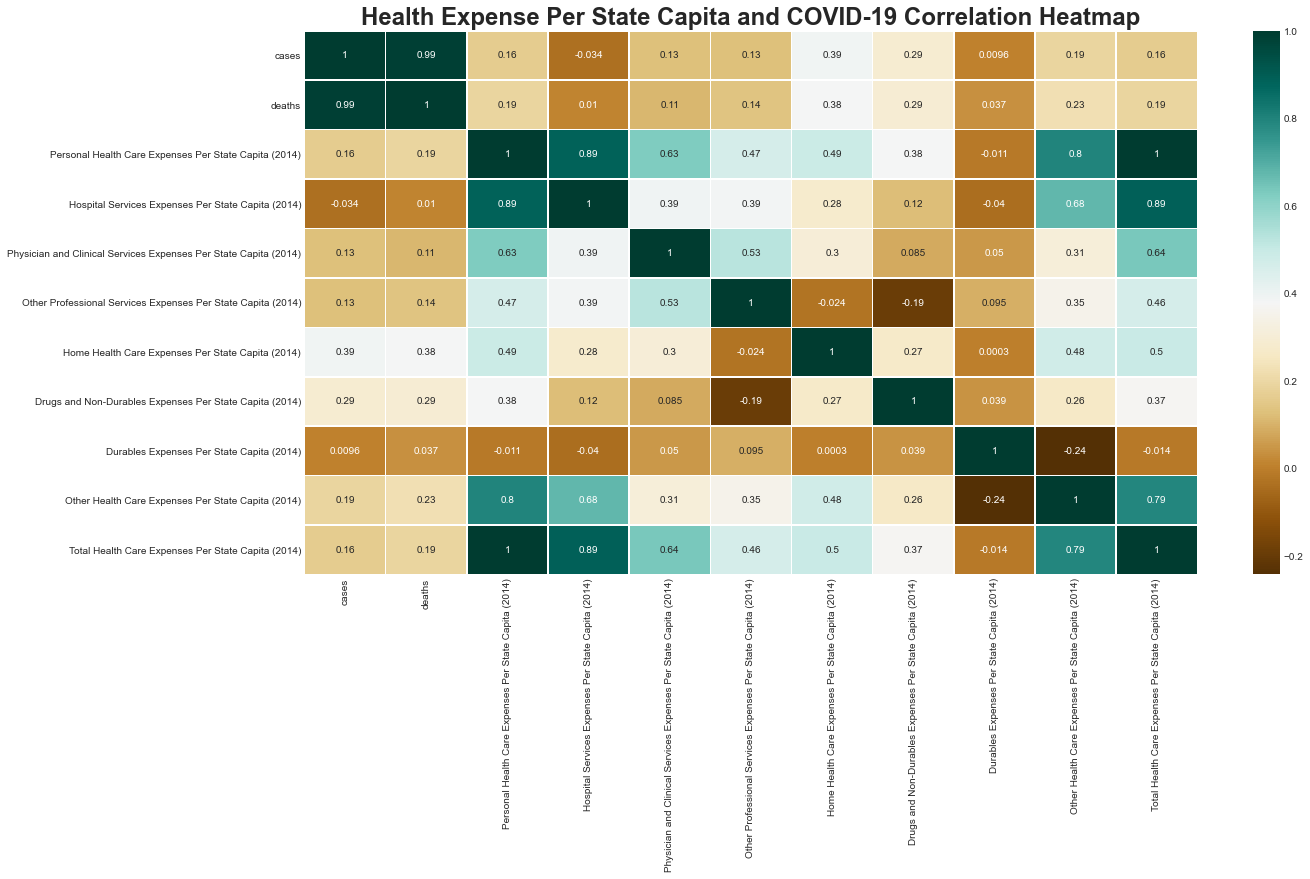

In [9]:
plt.figure(figsize = (20,10))
sns.heatmap(corr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Health Expense Per State Capita and COVID-19 Correlation Heatmap', fontweight = 'bold', fontsize = 24);

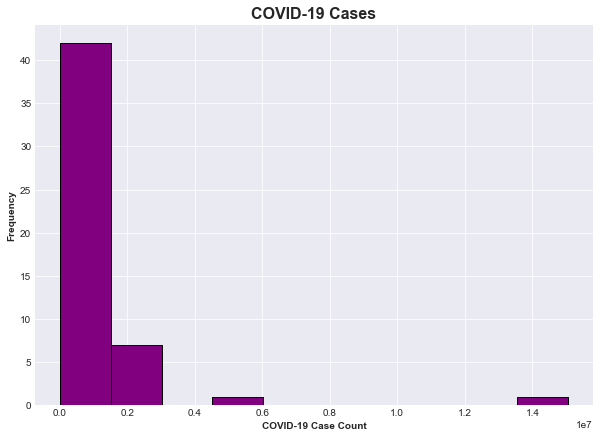

In [10]:
HPSCapDF['cases'].plot(kind = 'hist', color = 'purple', edgecolor = 'black', figsize = (10,7))
plt.title('COVID-19 Cases', fontsize = 16, fontweight = 'bold')
plt.xlabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

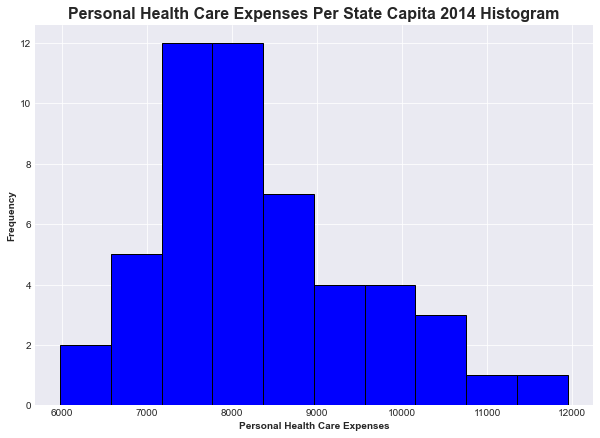

In [11]:
HPSCapDF['Personal Health Care Expenses Per State Capita (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Personal Health Care Expenses Per State Capita 2014 Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Personal Health Care Expenses', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

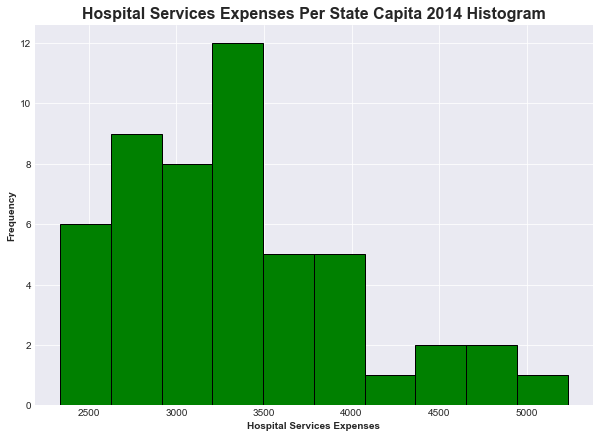

In [12]:
HPSCapDF['Hospital Services Expenses Per State Capita (2014)'].plot(kind = 'hist', color = 'green', edgecolor = 'black', figsize = (10,7))
plt.title('Hospital Services Expenses Per State Capita 2014 Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Hospital Services Expenses', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

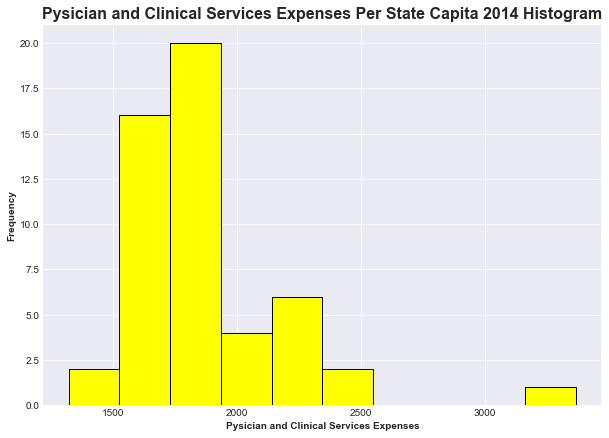

In [13]:
HPSCapDF['Physician and Clinical Services Expenses Per State Capita (2014)'].plot(kind = 'hist', color = 'yellow', edgecolor = 'black', figsize = (10,7))
plt.title('Pysician and Clinical Services Expenses Per State Capita 2014 Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Pysician and Clinical Services Expenses', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

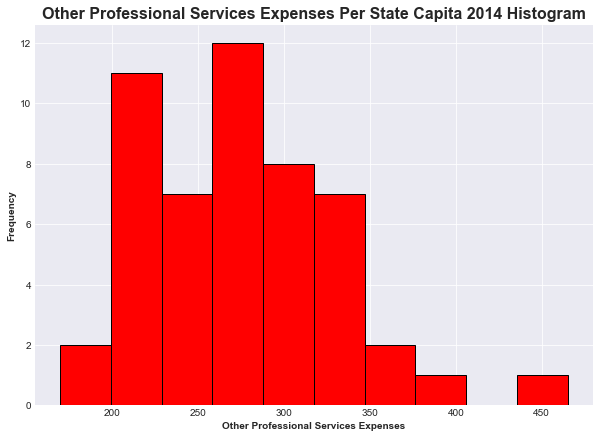

In [14]:
HPSCapDF['Other Professional Services Expenses Per State Capita (2014)'].plot(kind = 'hist', color = 'red', edgecolor = 'black', figsize = (10,7))
plt.title('Other Professional Services Expenses Per State Capita 2014 Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Other Professional Services Expenses', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

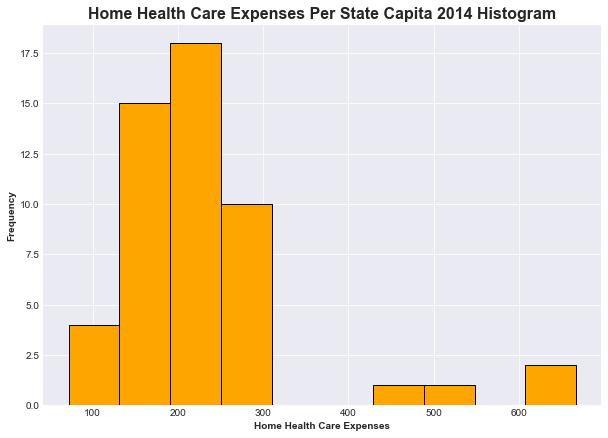

In [15]:
HPSCapDF['Home Health Care Expenses Per State Capita (2014)'].plot(kind = 'hist', color = 'orange', edgecolor = 'black', figsize = (10,7))
plt.title('Home Health Care Expenses Per State Capita 2014 Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Home Health Care Expenses', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

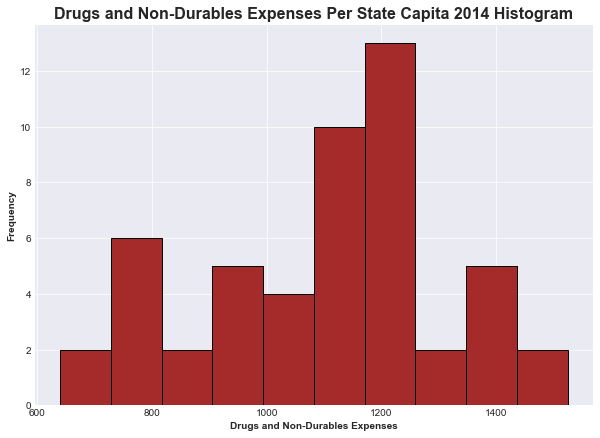

In [16]:
HPSCapDF['Drugs and Non-Durables Expenses Per State Capita (2014)'].plot(kind = 'hist', color = 'brown', edgecolor = 'black', figsize = (10,7))
plt.title('Drugs and Non-Durables Expenses Per State Capita 2014 Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Drugs and Non-Durables Expenses', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

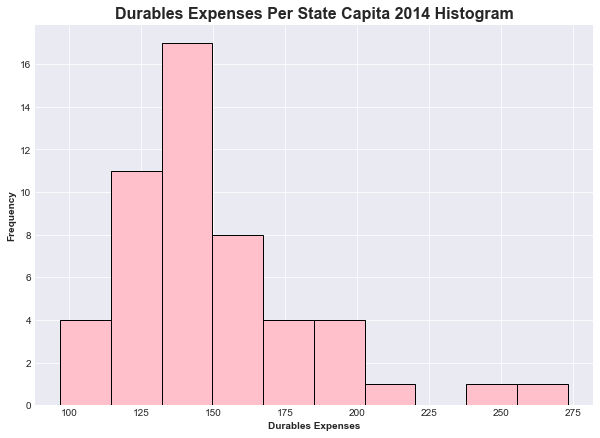

In [17]:
HPSCapDF['Durables Expenses Per State Capita (2014)'].plot(kind = 'hist', color = 'pink', edgecolor = 'black', figsize = (10,7))
plt.title('Durables Expenses Per State Capita 2014 Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Durables Expenses', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

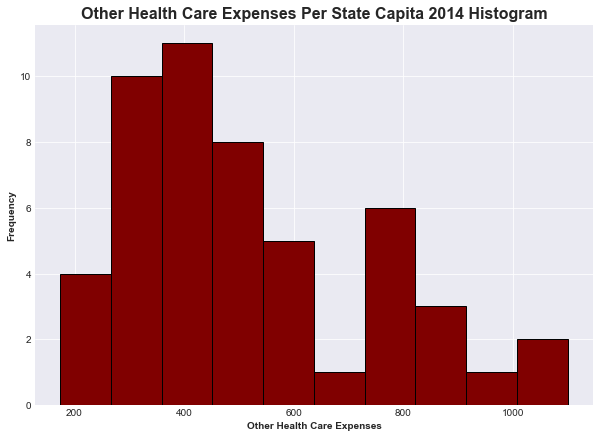

In [18]:
HPSCapDF['Other Health Care Expenses Per State Capita (2014)'].plot(kind = 'hist', color = 'maroon', edgecolor = 'black', figsize = (10,7))
plt.title('Other Health Care Expenses Per State Capita 2014 Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Other Health Care Expenses', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

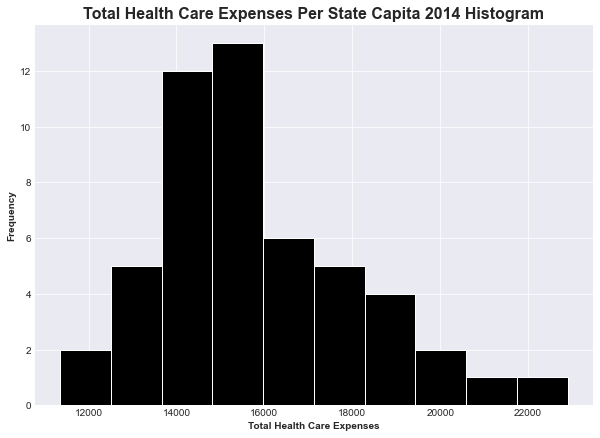

In [19]:
HPSCapDF['Total Health Care Expenses Per State Capita (2014)'].plot(kind = 'hist', color = 'black', edgecolor = 'white', figsize = (10,7))
plt.title('Total Health Care Expenses Per State Capita 2014 Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Total Health Care Expenses', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

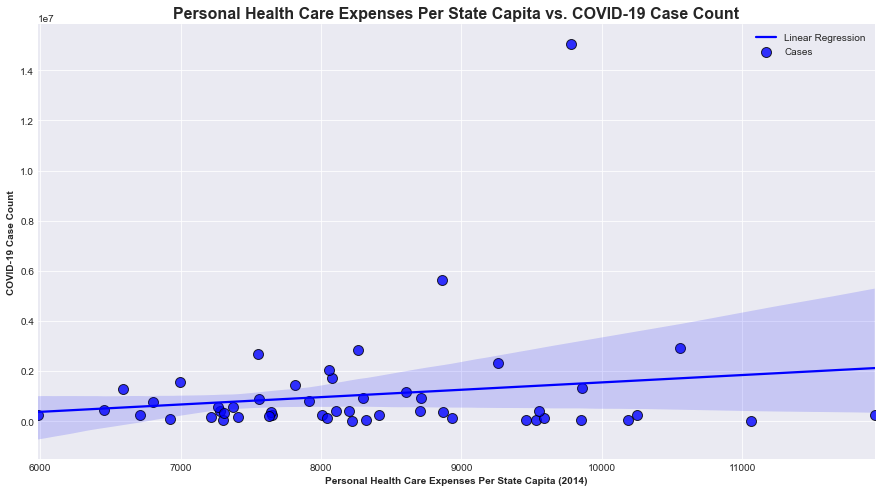

In [20]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Personal Health Care Expenses Per State Capita (2014)', y = 'cases', data = HPSCapDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Personal Health Care Expenses Per State Capita vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Personal Health Care Expenses Per State Capita (2014)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [21]:
model1 = sm.OLS(HPSCapDF['cases'], HPSCapDF['Personal Health Care Expenses Per State Capita (2014)']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.199
Model:                            OLS   Adj. R-squared (uncentered):              0.183
Method:                 Least Squares   F-statistic:                              12.40
Date:                Thu, 11 Jun 2020   Prob (F-statistic):                    0.000927
Time:                        20:06:32   Log-Likelihood:                         -817.32
No. Observations:                  51   AIC:                                      1637.
Df Residuals:                      50   BIC:                                      1639.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Personal Health Care Expenses Per State Capita (2014)   130.4184     37.038      3.521      0.001      56.024     204.812
==============================================================================
Omnibus:                       90.426   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1801.628
Skew:                           4.952   Prob(JB):                         0.00
Kurtosis:                      30.381   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

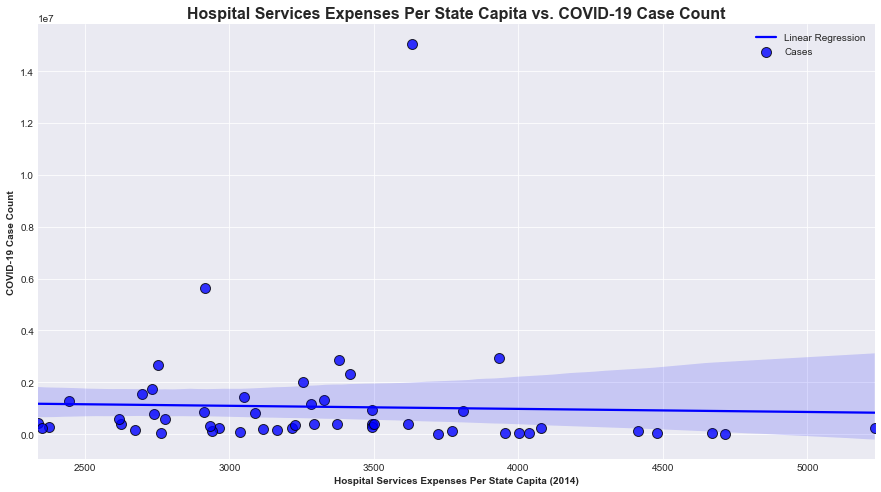

In [22]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Hospital Services Expenses Per State Capita (2014)', y = 'cases', data = HPSCapDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Hospital Services Expenses Per State Capita vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Hospital Services Expenses Per State Capita (2014)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [23]:
model2 = sm.OLS(HPSCapDF['cases'], HPSCapDF['Hospital Services Expenses Per State Capita (2014)']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.172
Model:                            OLS   Adj. R-squared (uncentered):              0.156
Method:                 Least Squares   F-statistic:                              10.39
Date:                Thu, 11 Jun 2020   Prob (F-statistic):                     0.00223
Time:                        20:06:32   Log-Likelihood:                         -818.15
No. Observations:                  51   AIC:                                      1638.
Df Residuals:                      50   BIC:                                      1640.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Hospital Services Expenses Per State Capita (2014)   301.4368     93.509      3.224      0.002     113.618     489.256
==============================================================================
Omnibus:                       88.758   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1673.650
Skew:                           4.831   Prob(JB):                         0.00
Kurtosis:                      29.348   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

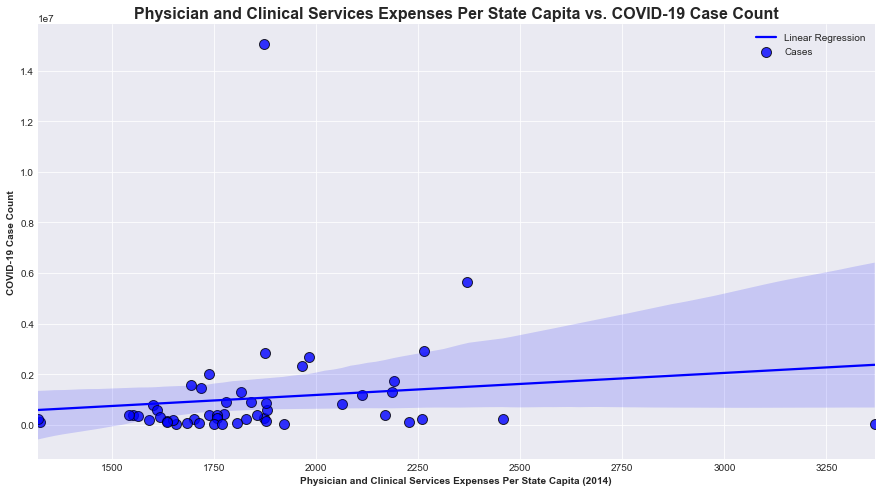

In [24]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Physician and Clinical Services Expenses Per State Capita (2014)', y = 'cases', data = HPSCapDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Physician and Clinical Services Expenses Per State Capita vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Physician and Clinical Services Expenses Per State Capita (2014)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [25]:
model3 = sm.OLS(HPSCapDF['cases'], HPSCapDF['Physician and Clinical Services Expenses Per State Capita (2014)']).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.195
Model:                            OLS   Adj. R-squared (uncentered):              0.179
Method:                 Least Squares   F-statistic:                              12.12
Date:                Thu, 11 Jun 2020   Prob (F-statistic):                     0.00104
Time:                        20:06:32   Log-Likelihood:                         -817.43
No. Observations:                  51   AIC:                                      1637.
Df Residuals:                      50   BIC:                                      1639.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Physician and Clinical Services Expenses Per State Capita (2014)   576.9526    165.699      3.482      0.001     244.137     909.768
==============================================================================
Omnibus:                       92.257   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1961.643
Skew:                           5.083   Prob(JB):                         0.00
Kurtosis:                      31.632   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

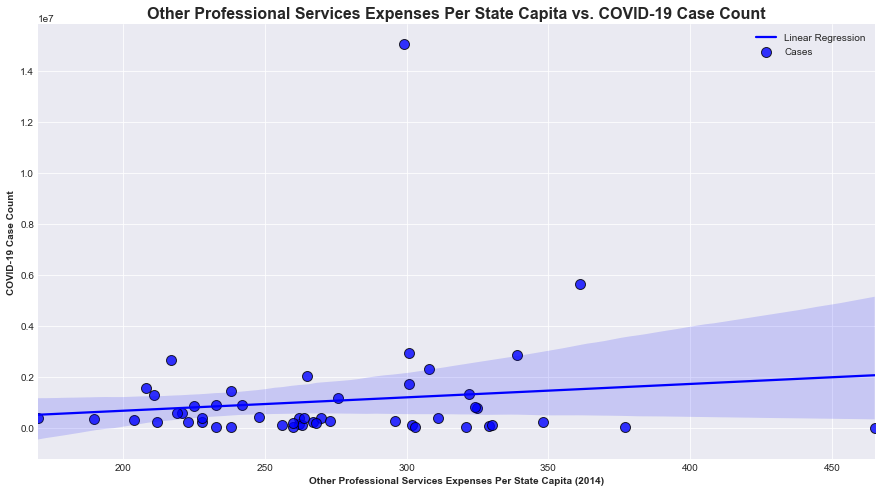

In [26]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Other Professional Services Expenses Per State Capita (2014)', y = 'cases', data = HPSCapDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Other Professional Services Expenses Per State Capita vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Other Professional Services Expenses Per State Capita (2014)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [27]:
model4 = sm.OLS(HPSCapDF['cases'], HPSCapDF['Other Professional Services Expenses Per State Capita (2014)']).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.196
Model:                            OLS   Adj. R-squared (uncentered):              0.180
Method:                 Least Squares   F-statistic:                              12.19
Date:                Thu, 11 Jun 2020   Prob (F-statistic):                     0.00101
Time:                        20:06:32   Log-Likelihood:                         -817.40
No. Observations:                  51   AIC:                                      1637.
Df Residuals:                      50   BIC:                                      1639.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Other Professional Services Expenses Per State Capita (2014)  3928.9048   1125.154      3.492      0.001    1668.966    6188.844
==============================================================================
Omnibus:                       90.917   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1857.470
Skew:                           4.980   Prob(JB):                         0.00
Kurtosis:                      30.837   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

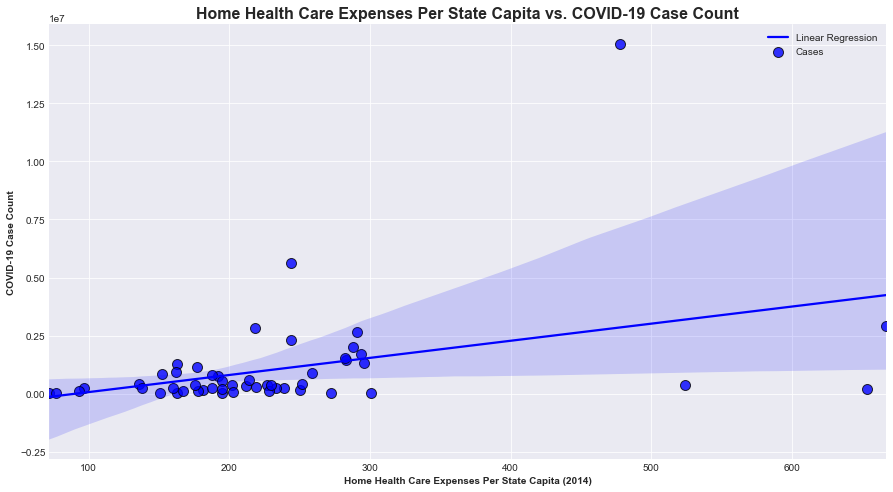

In [28]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Home Health Care Expenses Per State Capita (2014)', y = 'cases', data = HPSCapDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Home Health Care Expenses Per State Capita vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Home Health Care Expenses Per State Capita (2014)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [29]:
model5 = sm.OLS(HPSCapDF['cases'], HPSCapDF['Home Health Care Expenses Per State Capita (2014)']).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.293
Model:                            OLS   Adj. R-squared (uncentered):              0.278
Method:                 Least Squares   F-statistic:                              20.67
Date:                Thu, 11 Jun 2020   Prob (F-statistic):                    3.48e-05
Time:                        20:06:33   Log-Likelihood:                         -814.14
No. Observations:                  51   AIC:                                      1630.
Df Residuals:                      50   BIC:                                      1632.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Home Health Care Expenses Per State Capita (2014)  5101.7836   1122.042      4.547      0.000    2848.097    7355.470
==============================================================================
Omnibus:                       87.185   Durbin-Watson:                   2.192
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1597.867
Skew:                           4.700   Prob(JB):                         0.00
Kurtosis:                      28.760   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

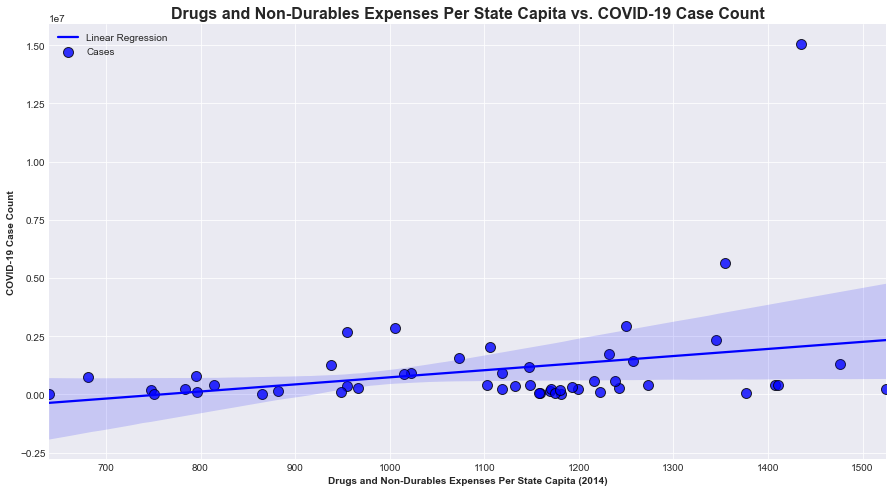

In [30]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Drugs and Non-Durables Expenses Per State Capita (2014)', y = 'cases', data = HPSCapDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Drugs and Non-Durables Expenses Per State Capita vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Drugs and Non-Durables Expenses Per State Capita (2014)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [31]:
model6 = sm.OLS(HPSCapDF['cases'], HPSCapDF['Drugs and Non-Durables Expenses Per State Capita (2014)']).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.221
Model:                            OLS   Adj. R-squared (uncentered):              0.205
Method:                 Least Squares   F-statistic:                              14.18
Date:                Thu, 11 Jun 2020   Prob (F-statistic):                    0.000438
Time:                        20:06:33   Log-Likelihood:                         -816.60
No. Observations:                  51   AIC:                                      1635.
Df Residuals:                      50   BIC:                                      1637.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================================
                                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
Drugs and Non-Durables Expenses Per State Capita (2014)  1029.7855    273.464      3.766      0.000     480.516    1579.055
==============================================================================
Omnibus:                       91.074   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1853.614
Skew:                           4.999   Prob(JB):                         0.00
Kurtosis:                      30.791   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

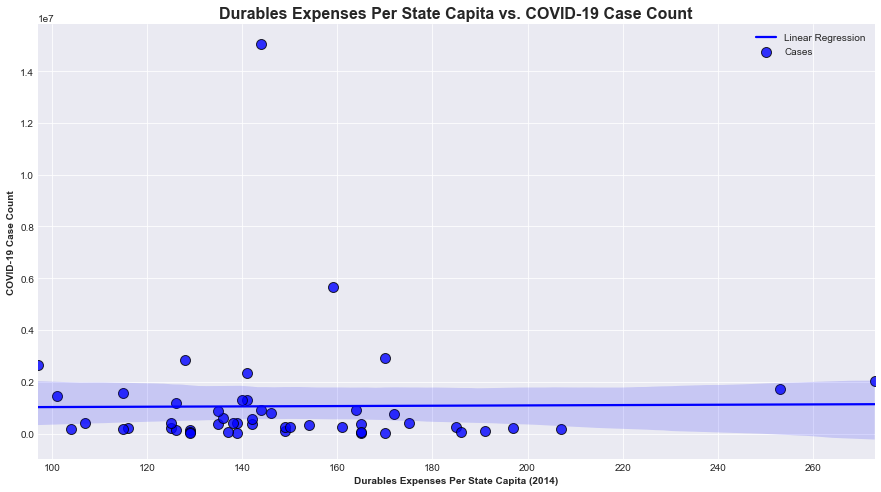

In [32]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Durables Expenses Per State Capita (2014)', y = 'cases', data = HPSCapDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Durables Expenses Per State Capita vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Durables Expenses Per State Capita (2014)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [33]:
model7 = sm.OLS(HPSCapDF['cases'], HPSCapDF['Durables Expenses Per State Capita (2014)']).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.177
Model:                            OLS   Adj. R-squared (uncentered):              0.160
Method:                 Least Squares   F-statistic:                              10.72
Date:                Thu, 11 Jun 2020   Prob (F-statistic):                     0.00193
Time:                        20:06:33   Log-Likelihood:                         -818.01
No. Observations:                  51   AIC:                                      1638.
Df Residuals:                      50   BIC:                                      1640.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Durables Expenses Per State Capita (2014)  6754.0231   2063.164      3.274      0.002    2610.036    1.09e+04
==============================================================================
Omnibus:                       91.018   Durbin-Watson:                   2.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1842.900
Skew:                           4.998   Prob(JB):                         0.00
Kurtosis:                      30.701   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

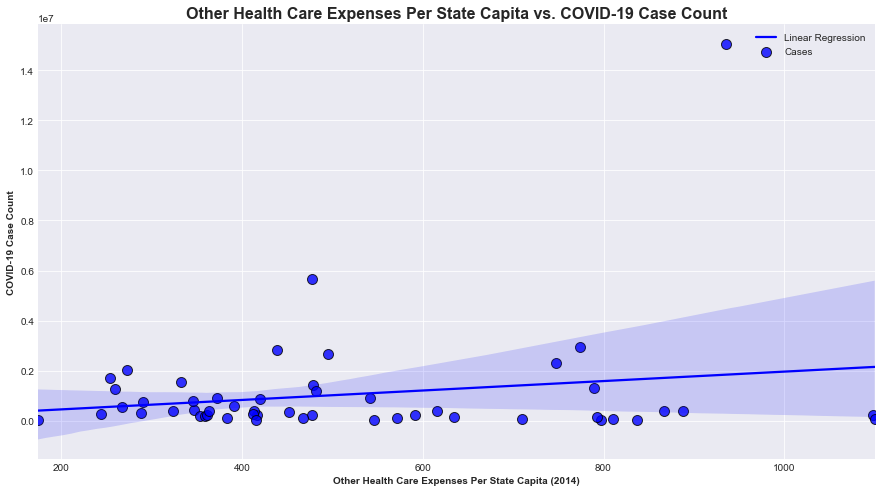

In [34]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Other Health Care Expenses Per State Capita (2014)', y = 'cases', data = HPSCapDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Other Health Care Expenses Per State Capita vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Other Health Care Expenses Per State Capita (2014)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [35]:
model8 = sm.OLS(HPSCapDF['cases'], HPSCapDF['Other Health Care Expenses Per State Capita (2014)']).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.214
Model:                            OLS   Adj. R-squared (uncentered):              0.198
Method:                 Least Squares   F-statistic:                              13.59
Date:                Thu, 11 Jun 2020   Prob (F-statistic):                    0.000561
Time:                        20:06:34   Log-Likelihood:                         -816.84
No. Observations:                  51   AIC:                                      1636.
Df Residuals:                      50   BIC:                                      1638.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Other Health Care Expenses Per State Capita (2014)  2010.6711    545.480      3.686      0.001     915.043    3106.300
==============================================================================
Omnibus:                       82.826   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1306.726
Skew:                           4.404   Prob(JB):                    1.77e-284
Kurtosis:                      26.180   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

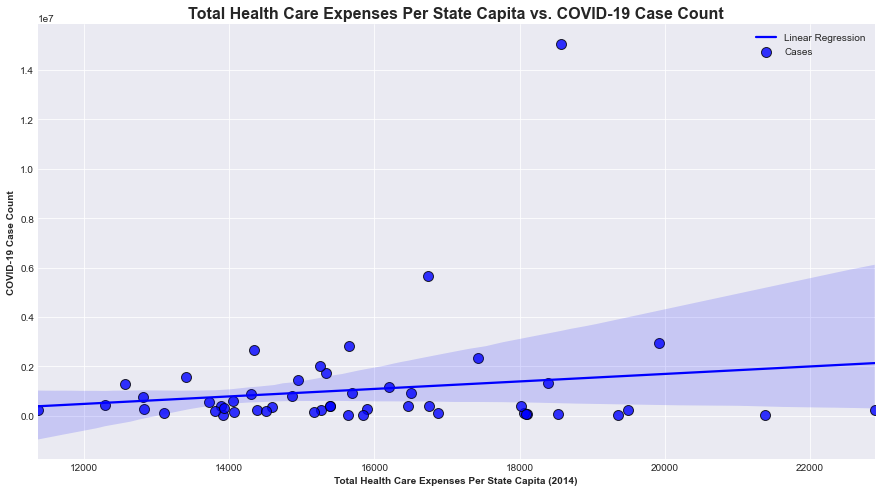

In [36]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Total Health Care Expenses Per State Capita (2014)', y = 'cases', data = HPSCapDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Total Health Care Expenses Per State Capita vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Total Health Care Expenses Per State Capita (2014)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [37]:
model9 = sm.OLS(HPSCapDF['cases'], HPSCapDF['Total Health Care Expenses Per State Capita (2014)']).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.198
Model:                            OLS   Adj. R-squared (uncentered):              0.182
Method:                 Least Squares   F-statistic:                              12.37
Date:                Thu, 11 Jun 2020   Prob (F-statistic):                    0.000938
Time:                        20:06:34   Log-Likelihood:                         -817.33
No. Observations:                  51   AIC:                                      1637.
Df Residuals:                      50   BIC:                                      1639.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Total Health Care Expenses Per State Capita (2014)    68.7056     19.534      3.517      0.001      29.470     107.941
==============================================================================
Omnibus:                       90.354   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1796.047
Skew:                           4.947   Prob(JB):                         0.00
Kurtosis:                      30.337   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
model10 = sm.OLS(HPSCapDF['cases'], HPSCapDF[['Personal Health Care Expenses Per State Capita (2014)', 'Hospital Services Expenses Per State Capita (2014)',
                                      'Physician and Clinical Services Expenses Per State Capita (2014)', 'Other Professional Services Expenses Per State Capita (2014)',
                                      'Home Health Care Expenses Per State Capita (2014)', 'Drugs and Non-Durables Expenses Per State Capita (2014)',
                                      'Durables Expenses Per State Capita (2014)', 'Other Health Care Expenses Per State Capita (2014)', 'Total Health Care Expenses Per State Capita (2014)']]).fit()
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.409
Model:                            OLS   Adj. R-squared (uncentered):              0.299
Method:                 Least Squares   F-statistic:                              3.723
Date:                Thu, 11 Jun 2020   Prob (F-statistic):                     0.00219
Time:                        20:06:34   Log-Likelihood:                         -809.54
No. Observations:                  51   AIC:                                      1635.
Df Residuals:                      43   BIC:                                      1651.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Personal Health Care Expenses Per State Capita (2014)            -2957.2660   5063.402     -0.584      0.562   -1.32e+04    7254.058
Hospital Services Expenses Per State Capita (2014)               -2796.0542   1520.948     -1.838      0.073   -5863.338     271.230
Physician and Clinical Services Expenses Per State Capita (2014) -2547.2951   1885.022     -1.351      0.184   -6348.805    1254.214
Other Professional Services Expenses Per State Capita (2014)      1.138e+04   7399.471      1.538      0.131   -3538.760    2.63e+04
Home Health Care Expenses Per State Capita (2014)                 6523.5655   3083.775      2.115      0.040     304.541    1.27e+04
Drugs and Non-Durables Expenses Per State Capita (2014)            705.2688   2151.090      0.328      0.745   -3632.818    5043.355
Durables Expenses Per State Capita (2014)                        -7187.5904   8627.177     -0.833      0.409   -2.46e+04    1.02e+04
Other Health Care Expenses Per State Capita (2014)                -852.7976   2309.581     -0.369      0.714   -5510.512    3804.916
Total Health Care Expenses Per State Capita (2014)                2271.5260   2511.560      0.904      0.371   -2793.517    7336.569
==============================================================================
Omnibus:                       74.563   Durbin-Watson:                   2.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              961.485
Skew:                           3.814   Prob(JB):                    1.65e-209
Kurtosis:                      22.856   Cond. No.                     7.24e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.33e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

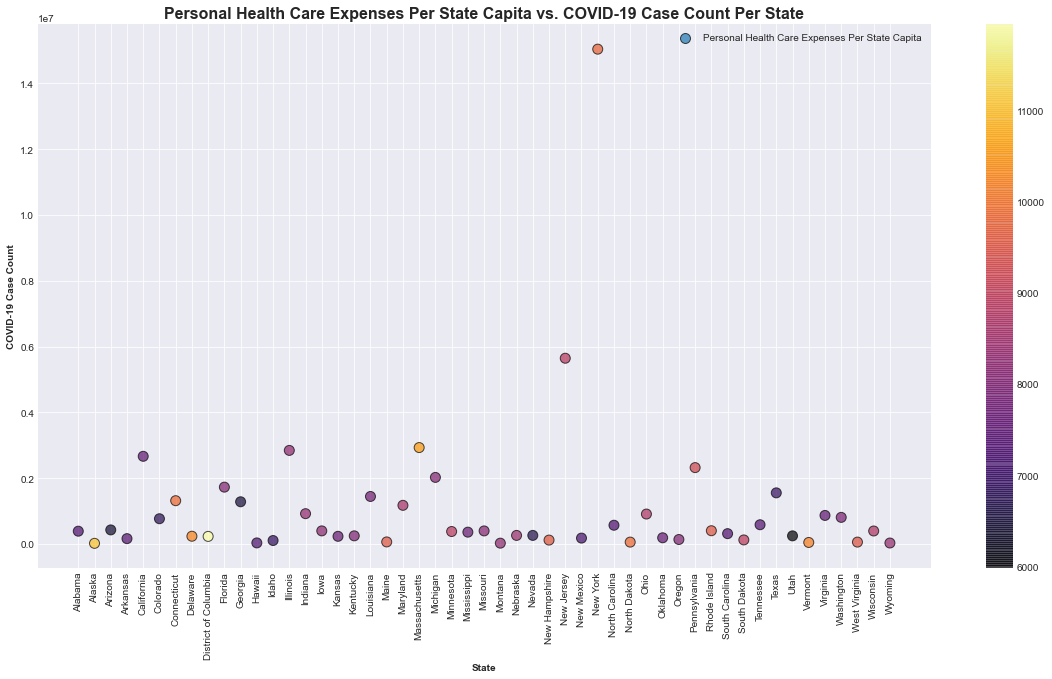

In [39]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HPSCapDF['State'] 
y = HPSCapDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HPSCapDF['Personal Health Care Expenses Per State Capita (2014)'], cmap = 'inferno')
plt.title('Personal Health Care Expenses Per State Capita vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Personal Health Care Expenses Per State Capita'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

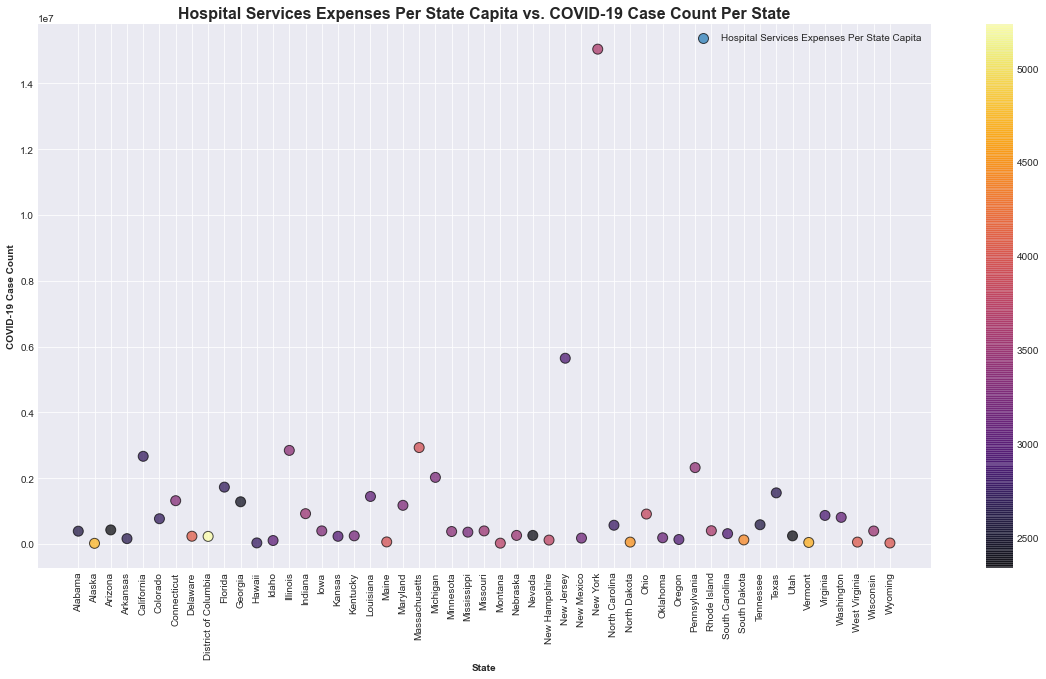

In [40]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HPSCapDF['State'] 
y = HPSCapDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HPSCapDF['Hospital Services Expenses Per State Capita (2014)'], cmap = 'inferno')
plt.title('Hospital Services Expenses Per State Capita vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Hospital Services Expenses Per State Capita'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

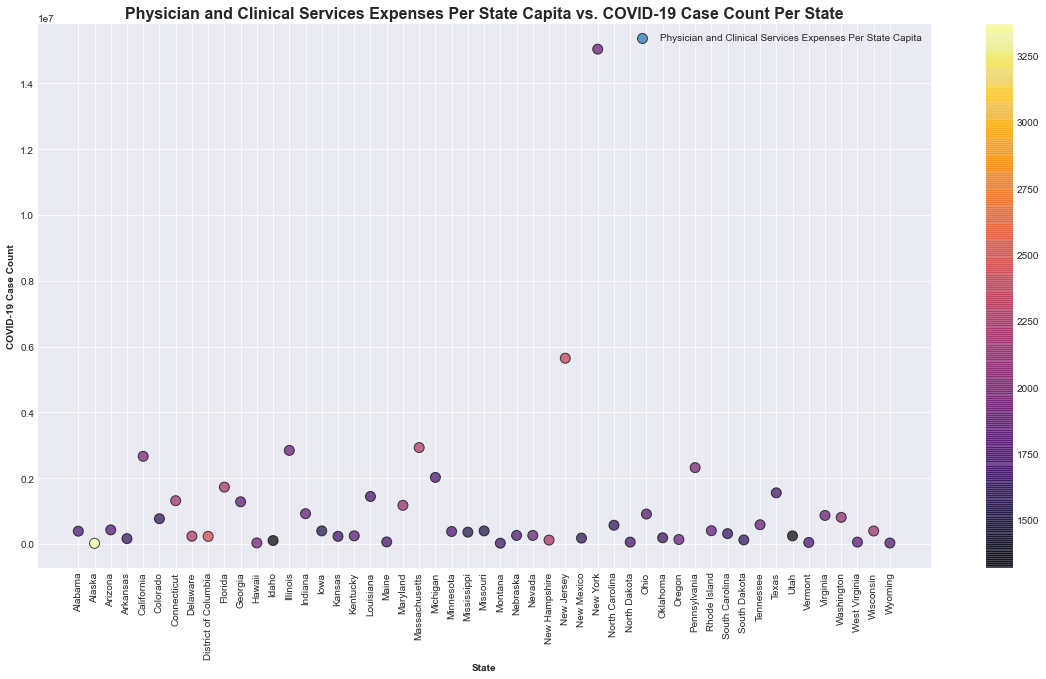

In [41]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HPSCapDF['State'] 
y = HPSCapDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HPSCapDF['Physician and Clinical Services Expenses Per State Capita (2014)'], cmap = 'inferno')
plt.title('Physician and Clinical Services Expenses Per State Capita vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Physician and Clinical Services Expenses Per State Capita'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

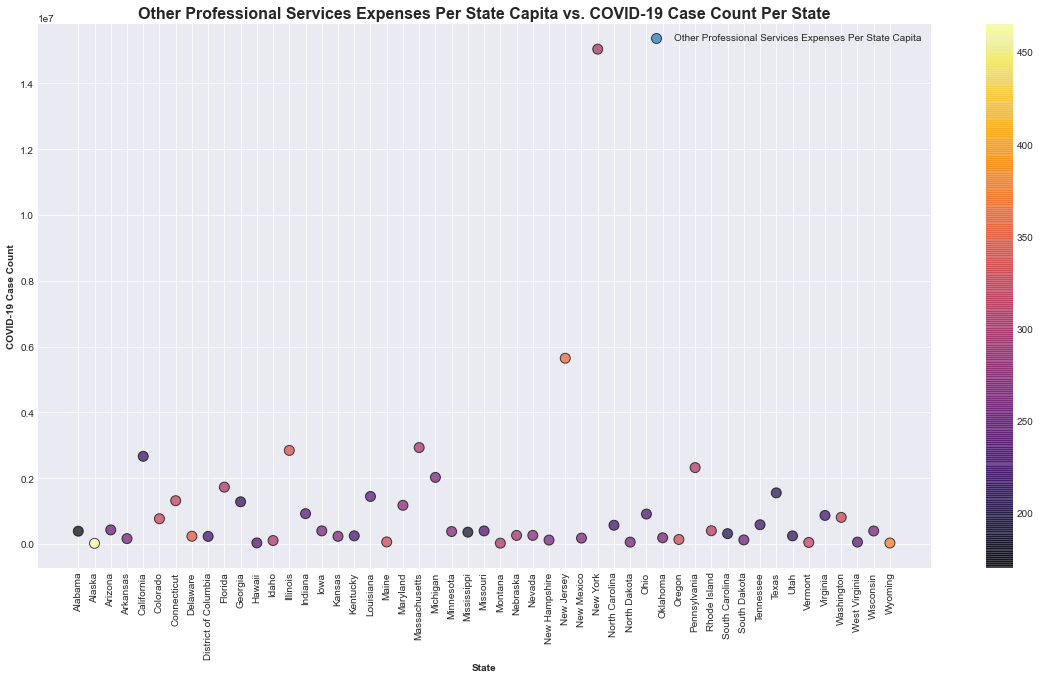

In [42]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HPSCapDF['State'] 
y = HPSCapDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HPSCapDF['Other Professional Services Expenses Per State Capita (2014)'], cmap = 'inferno')
plt.title('Other Professional Services Expenses Per State Capita vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Other Professional Services Expenses Per State Capita'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

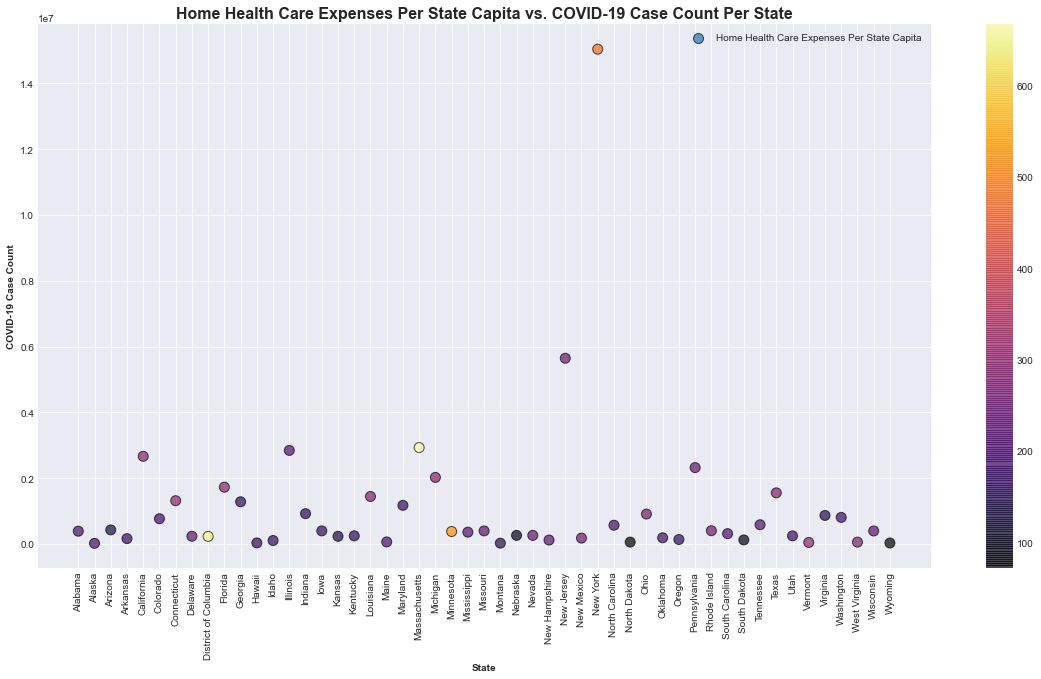

In [43]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HPSCapDF['State'] 
y = HPSCapDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HPSCapDF['Home Health Care Expenses Per State Capita (2014)'], cmap = 'inferno')
plt.title('Home Health Care Expenses Per State Capita vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Home Health Care Expenses Per State Capita'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

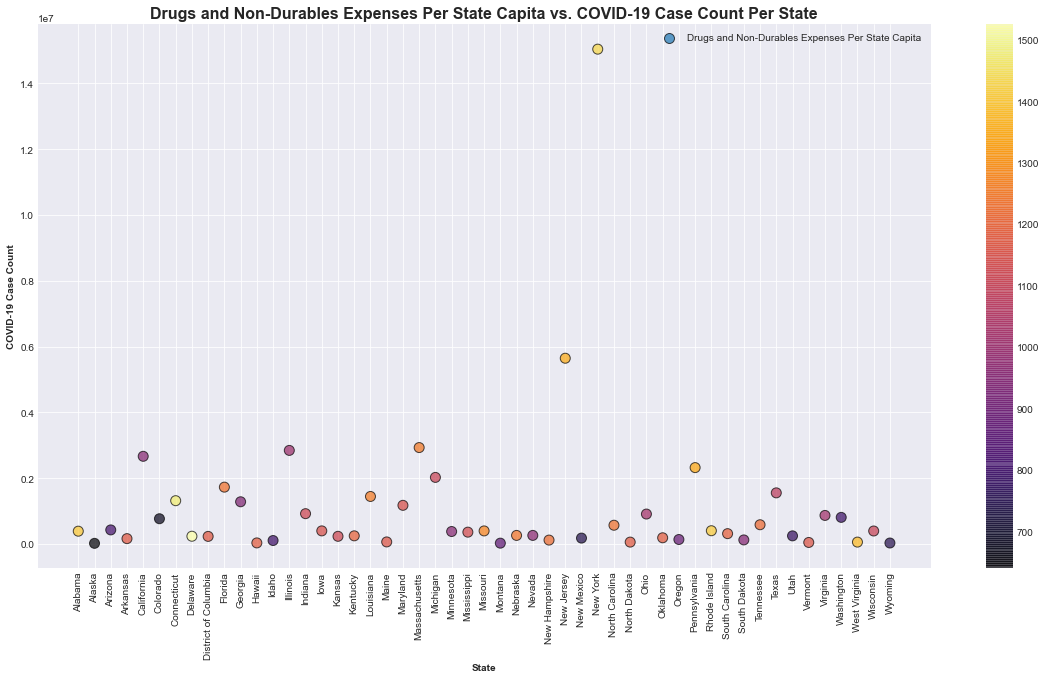

In [44]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HPSCapDF['State'] 
y = HPSCapDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HPSCapDF['Drugs and Non-Durables Expenses Per State Capita (2014)'], cmap = 'inferno')
plt.title('Drugs and Non-Durables Expenses Per State Capita vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Drugs and Non-Durables Expenses Per State Capita'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

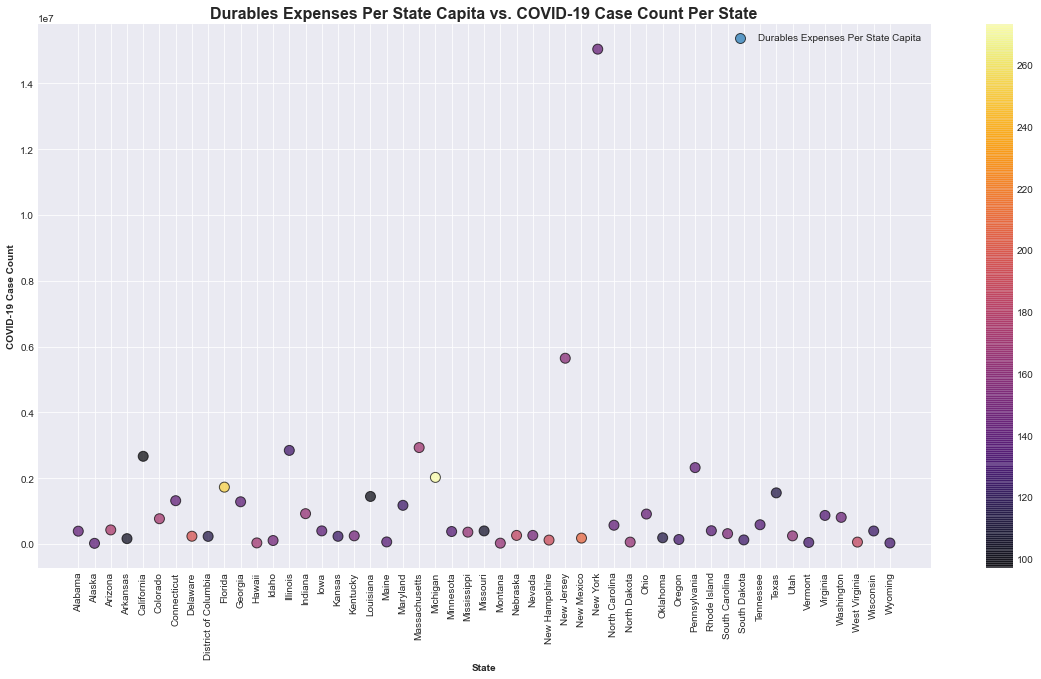

In [45]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HPSCapDF['State'] 
y = HPSCapDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HPSCapDF['Durables Expenses Per State Capita (2014)'], cmap = 'inferno')
plt.title('Durables Expenses Per State Capita vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Durables Expenses Per State Capita'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

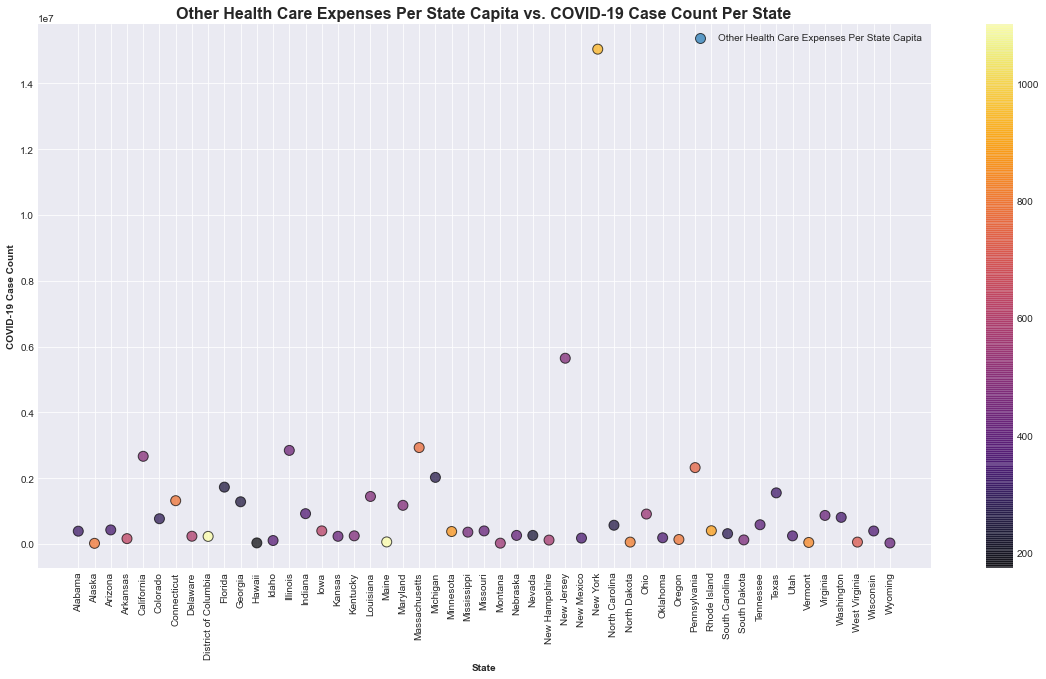

In [46]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HPSCapDF['State'] 
y = HPSCapDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HPSCapDF['Other Health Care Expenses Per State Capita (2014)'], cmap = 'inferno')
plt.title('Other Health Care Expenses Per State Capita vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Other Health Care Expenses Per State Capita'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

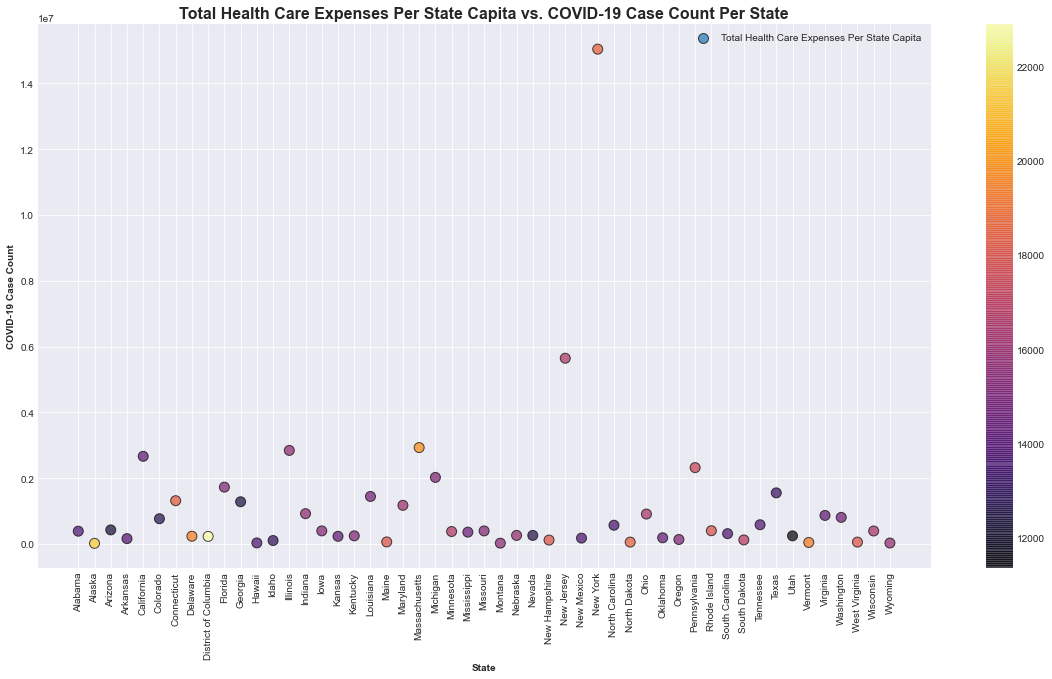

In [47]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HPSCapDF['State'] 
y = HPSCapDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HPSCapDF['Total Health Care Expenses Per State Capita (2014)'], cmap = 'inferno')
plt.title('Total Health Care Expenses Per State Capita vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Total Health Care Expenses Per State Capita'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

# Break

In [101]:
test_len = int(0.25 * len(HPSCapDF))
train_len = len(HPSCapDF) - test_len
print('Train Set Len: ' + str(train_len))
print('Test Set Len: ' + str(test_len))

train = HPSCapDF[:train_len]
test = HPSCapDF[train_len:]
print('Train Set Shape: ' + str(train.shape))
print('Test Set Shape: ' + str(test.shape))

Train Set Len: 39
Test Set Len: 12
Train Set Shape: (39, 12)
Test Set Shape: (12, 12)


In [102]:
features_list = ['Personal Health Care Expenses Per State Capita (2014)']
    
target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

RandomForestModel = RandomForestRegressor()
RandomForestModel.fit(X_train_scaled, y_train_scaled)

train_predictions_scaled = RandomForestModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = RandomForestModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 648514.9083333332
MSE Value: 495127559428.1536
RMS Value: 703653.0106722728
R2 Score: -1.6928925741961334


<ipython-input-102-ae78907270df>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestModel.fit(X_train_scaled, y_train_scaled)


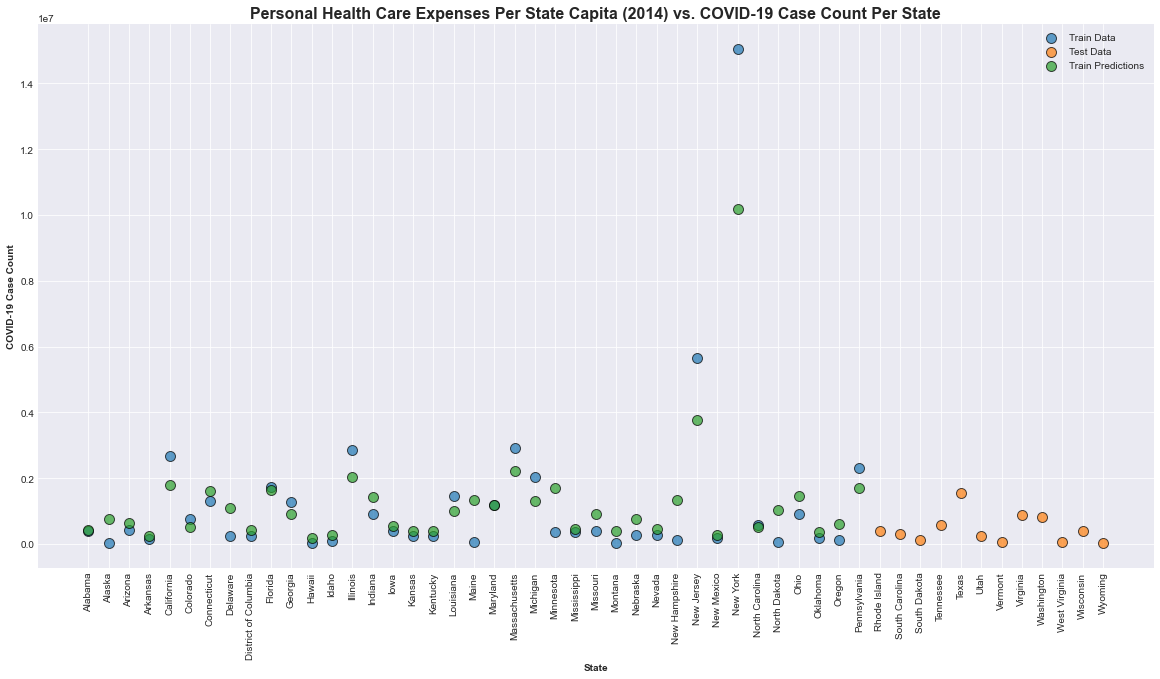

In [103]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Personal Health Care Expenses Per State Capita (2014) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

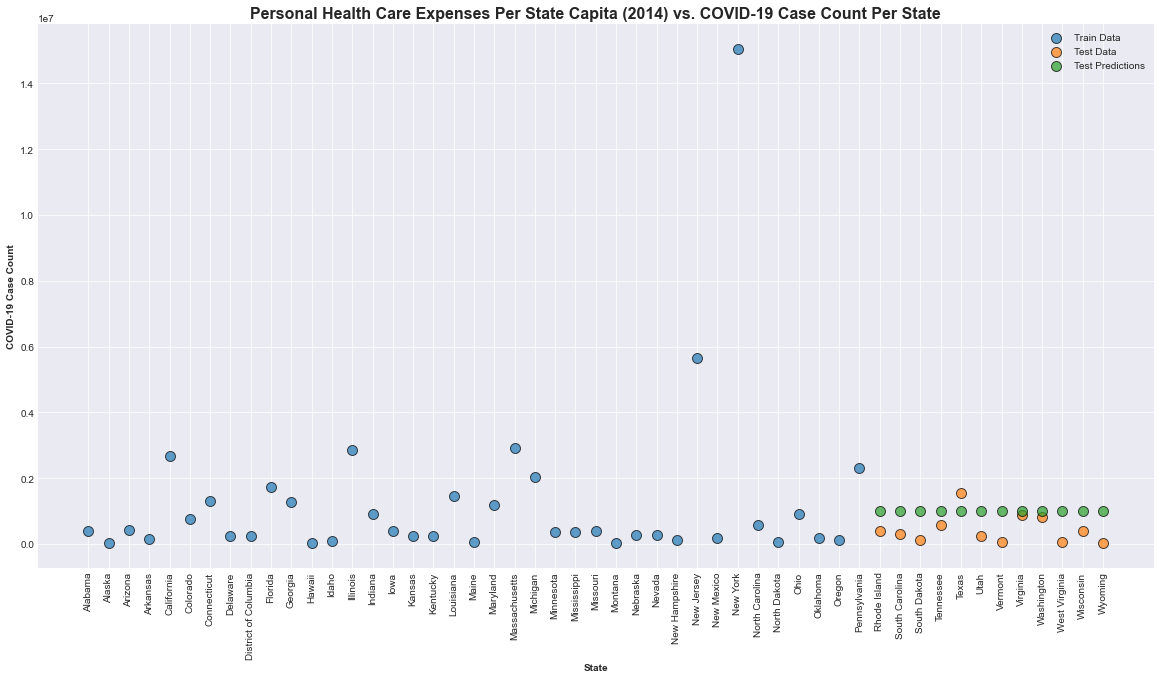

In [104]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Personal Health Care Expenses Per State Capita (2014) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

## Random Search CV

In [107]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(RandomForestModel.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [108]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [110]:
RF_NewModel = RandomizedSearchCV(estimator=RandomForestModel, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)


# Fit the random search model
RF_NewModel.fit(X_train_scaled, y_train_scaled);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.2min finished
c:\python38\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [117]:
RF_NewModel.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [120]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_accuracy = evaluate(RandomForestModel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.6008 degrees.
Accuracy = 84.25%.


In [123]:
new_accuracy = evaluate(RF_NewModel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.5579 degrees.
Accuracy = 101.41%.


In [122]:
print('Improvement of {:0.2f}%.'.format( 100 * (new_accuracy - base_accuracy) / new_accuracy))

Improvement of 16.92%.


In [114]:
train_predictions_scaled = RF_NewModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = RF_NewModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 479082.5656078567
MSE Value: 295279039902.20654
RMS Value: 543395.8408952046
R2 Score: -0.6059593507313101


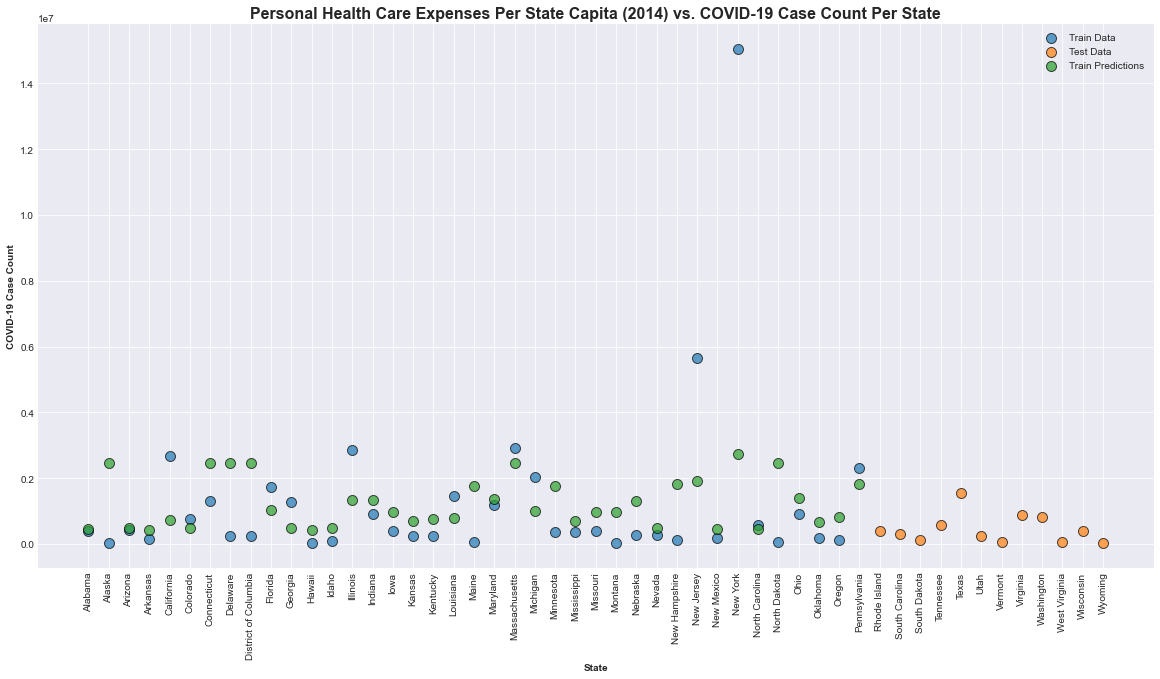

In [115]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Personal Health Care Expenses Per State Capita (2014) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

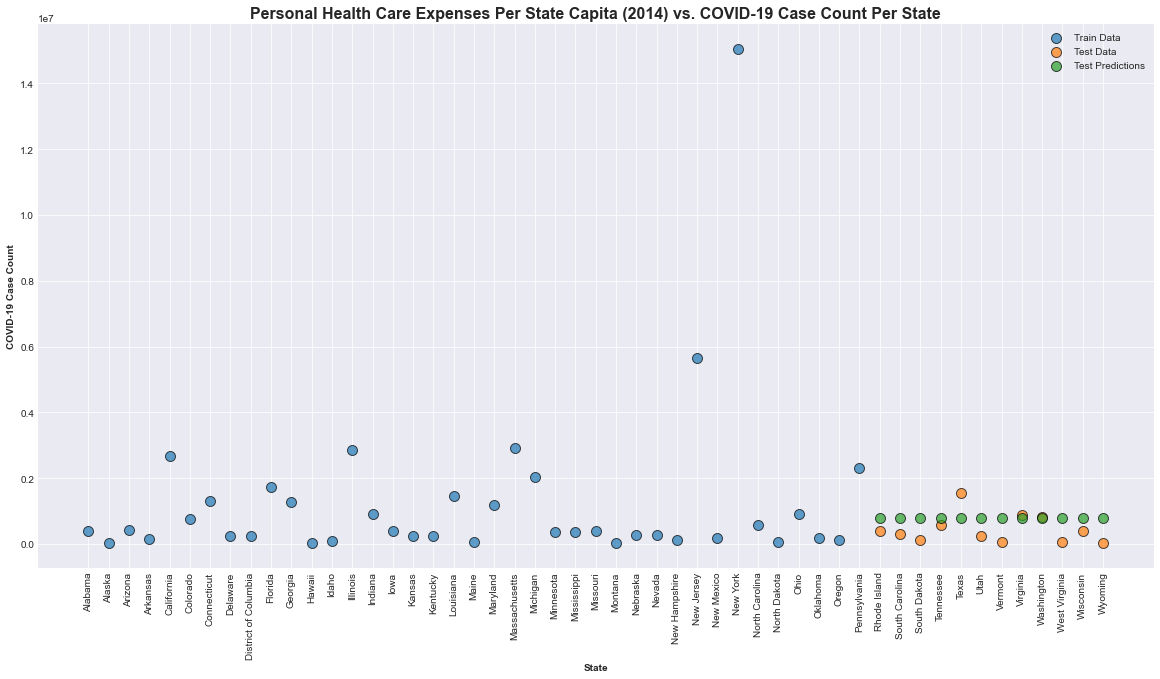

In [116]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Personal Health Care Expenses Per State Capita (2014) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

## Grid Search CV

In [125]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [0, 1],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
RF_NewModel = GridSearchCV(estimator = RandomForestModel, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

# Fit the random search model
RF_NewModel.fit(X_train_scaled, y_train_scaled);

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.5min finished
c:\python38\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [126]:
RF_NewModel.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 1,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 100}

In [127]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_accuracy = evaluate(RandomForestModel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.6008 degrees.
Accuracy = 84.25%.


In [128]:
new_accuracy = evaluate(RF_NewModel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.5480 degrees.
Accuracy = 101.58%.


In [129]:
print('Improvement of {:0.2f}%.'.format( 100 * (new_accuracy - base_accuracy) / new_accuracy))

Improvement of 17.05%.


In [130]:
train_predictions_scaled = RF_NewModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = RF_NewModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 459864.58326771756
MSE Value: 271097432044.8977
RMS Value: 520670.17587422626
R2 Score: -0.4744407733645437


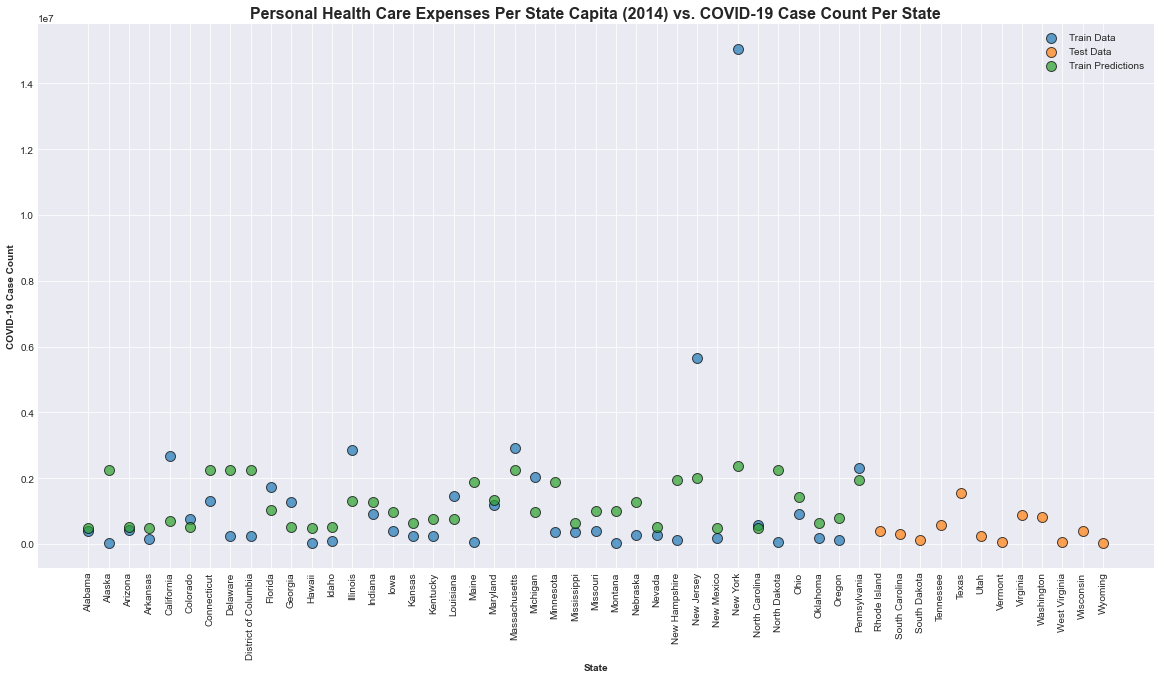

In [131]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Personal Health Care Expenses Per State Capita (2014) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

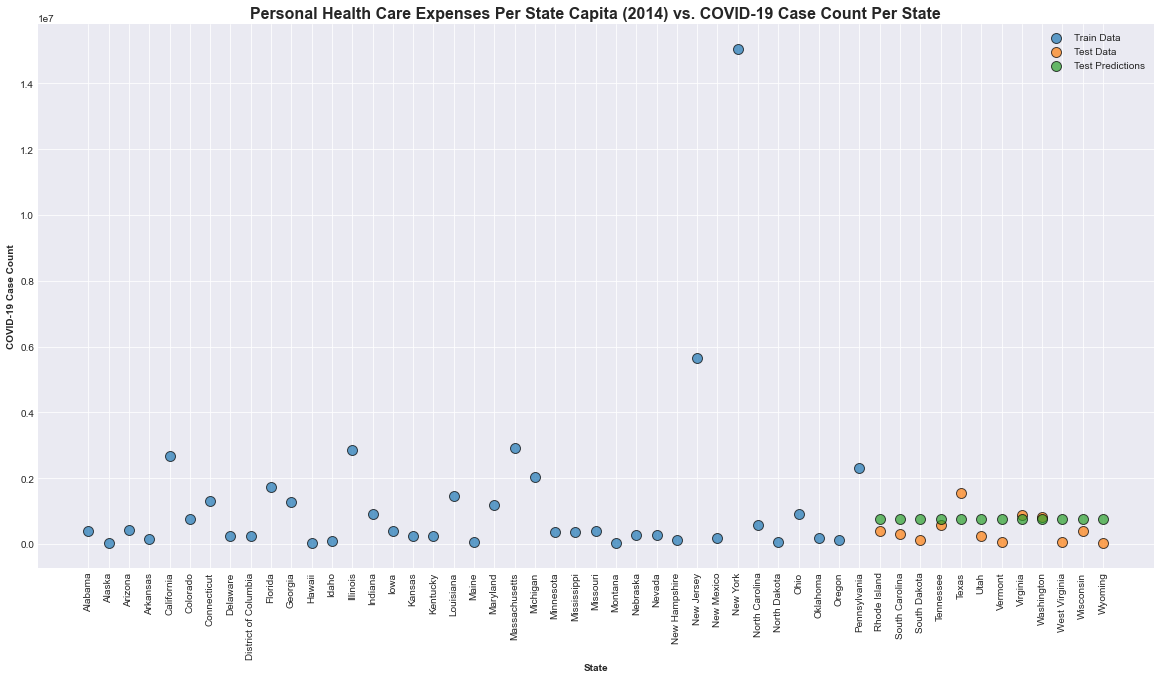

In [132]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Personal Health Care Expenses Per State Capita (2014) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

# Break

In [52]:
features_list = ['Hospital Services Expenses Per State Capita (2014)']
    
target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

RandomForestModel = RandomForestRegressor()
RandomForestModel.fit(X_train_scaled, y_train_scaled)

train_predictions = RandomForestModel.predict(X_train_scaled)
test_predictions = RandomForestModel.predict(X_test_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 451533.2515342858
MSE Value: 387746856234.2011
RMS Value: 622693.2280298229
R2 Score: -1.1088719663008186


<ipython-input-52-19e2e38b6082>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestModel.fit(X_train_scaled, y_train_scaled)


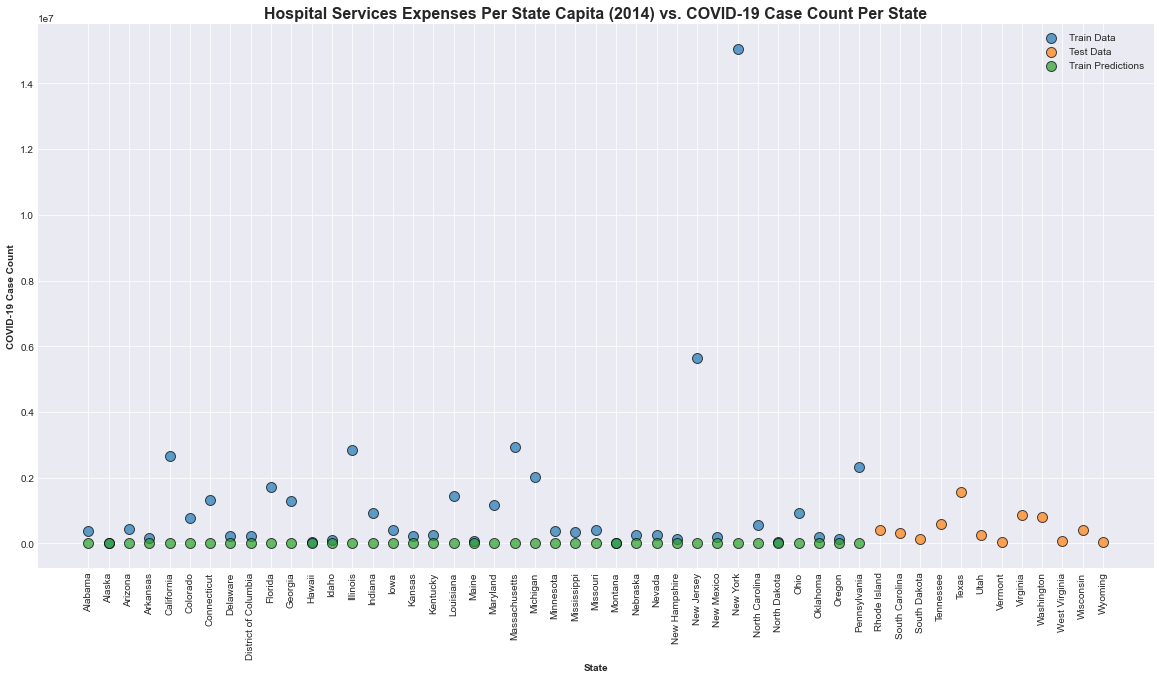

In [53]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Hospital Services Expenses Per State Capita (2014) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

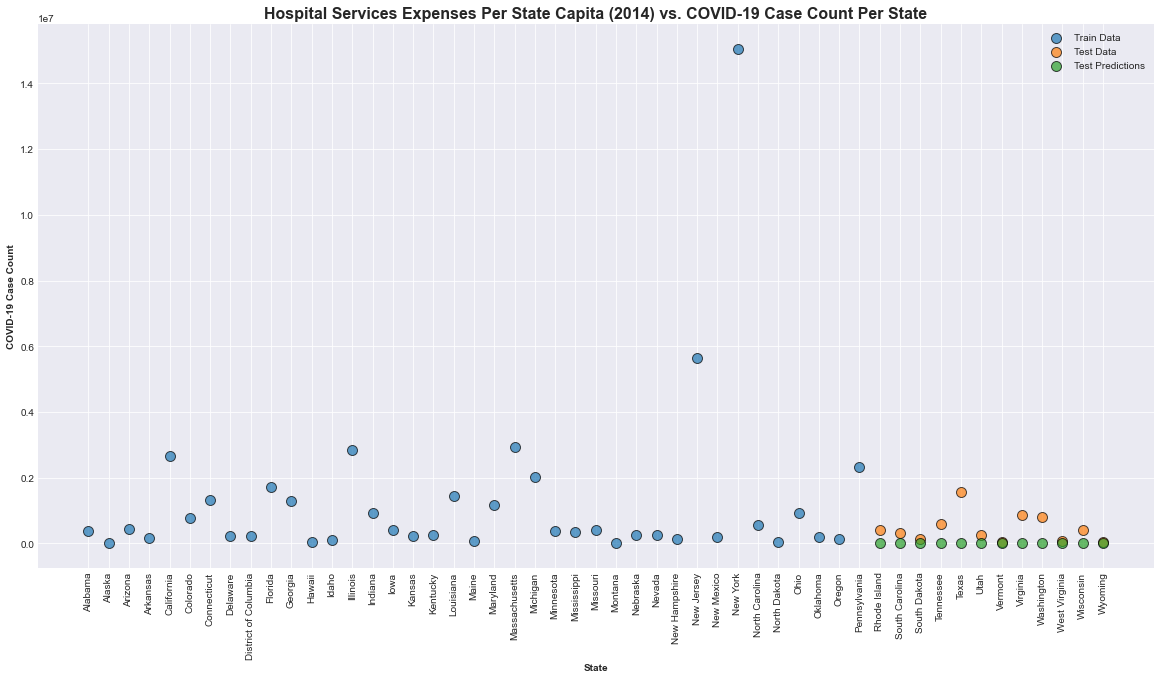

In [54]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Hospital Services Expenses Per State Capita (2014) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [55]:
features_list = ['Physician and Clinical Services Expenses Per State Capita (2014)']
    
target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

RandomForestModel = RandomForestRegressor()
RandomForestModel.fit(X_train_scaled, y_train_scaled)

train_predictions = RandomForestModel.predict(X_train_scaled)
test_predictions = RandomForestModel.predict(X_test_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 451533.30498823104
MSE Value: 387746904506.6713
RMS Value: 622693.2667908586
R2 Score: -1.1088722288444282


<ipython-input-55-6262af24aee1>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestModel.fit(X_train_scaled, y_train_scaled)


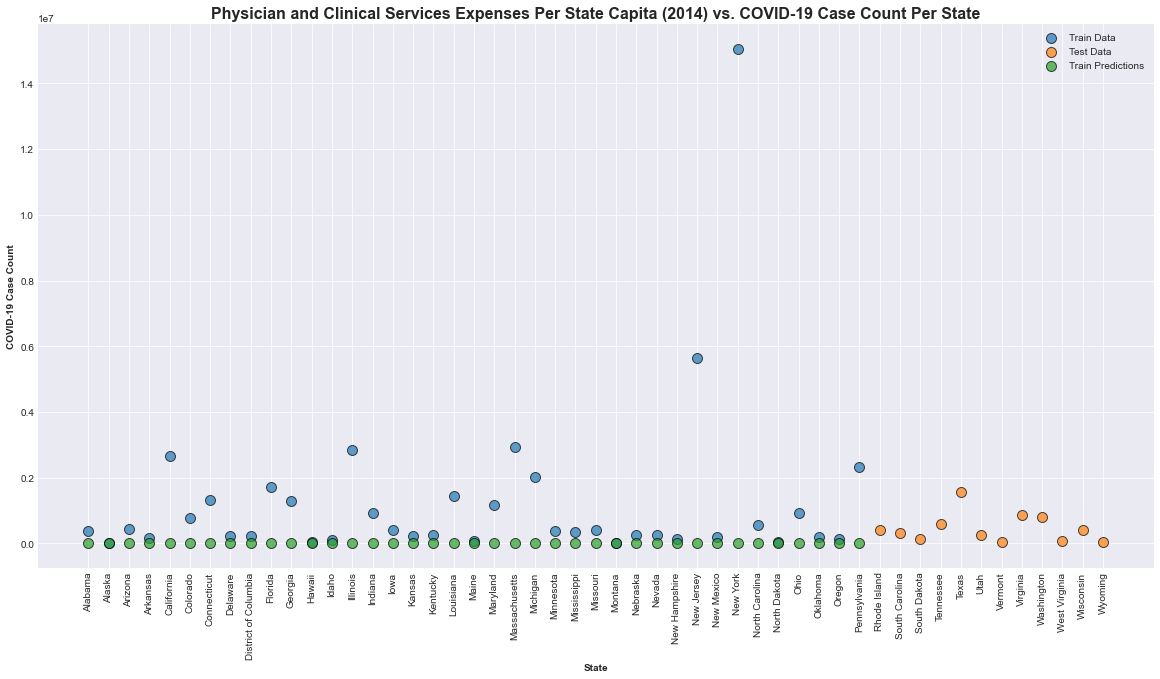

In [56]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Physician and Clinical Services Expenses Per State Capita (2014) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

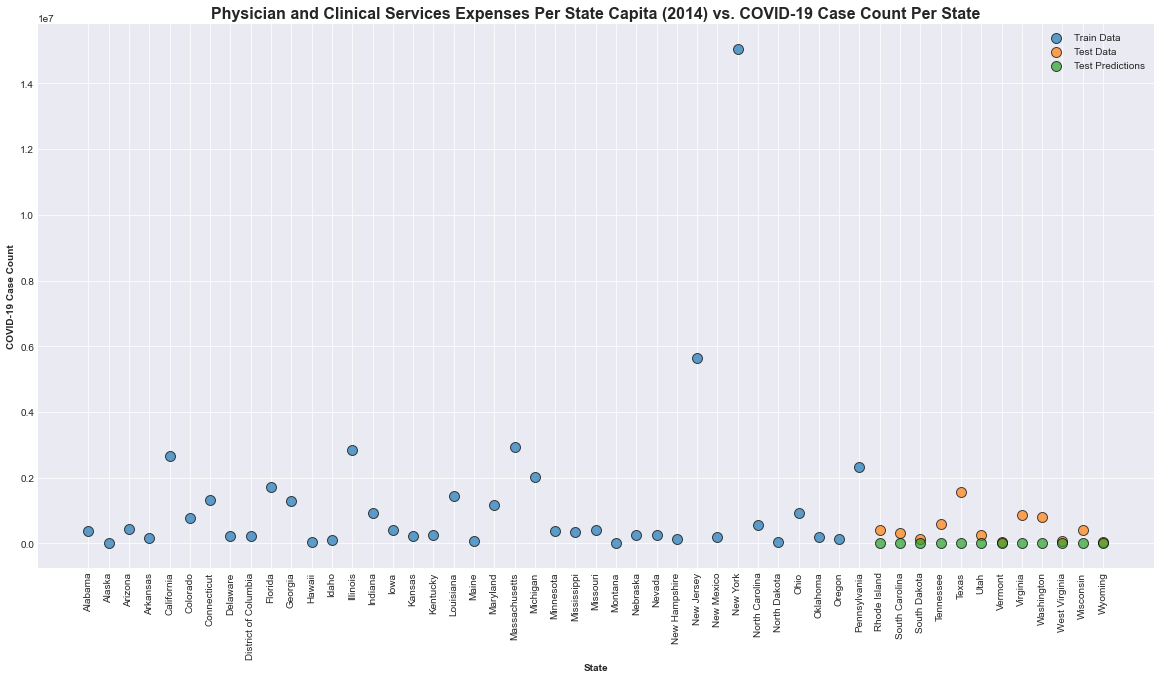

In [57]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Physician and Clinical Services Expenses Per State Capita (2014) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [58]:
features_list = ['Other Professional Services Expenses Per State Capita (2014)']
    
target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

RandomForestModel = RandomForestRegressor()
RandomForestModel.fit(X_train_scaled, y_train_scaled)

train_predictions = RandomForestModel.predict(X_train_scaled)
test_predictions = RandomForestModel.predict(X_test_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 451533.16654870054
MSE Value: 387746779486.57275
RMS Value: 622693.1664042675
R2 Score: -1.108871548886933


<ipython-input-58-bf0ff4916099>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestModel.fit(X_train_scaled, y_train_scaled)


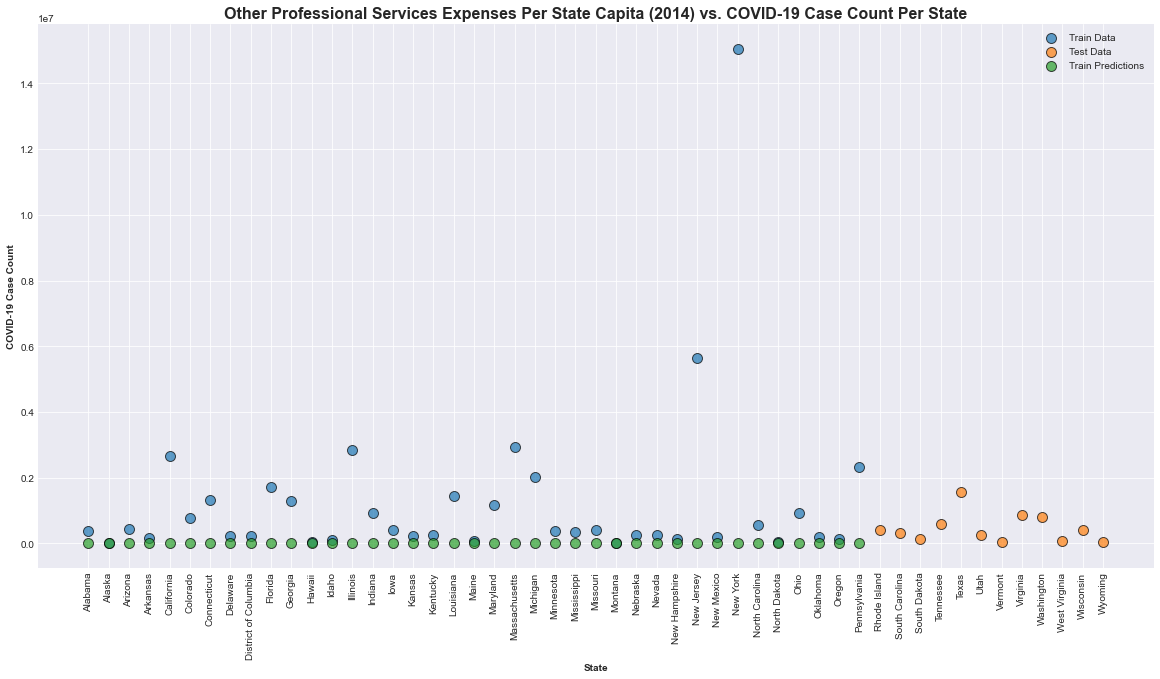

In [59]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Other Professional Services Expenses Per State Capita (2014) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

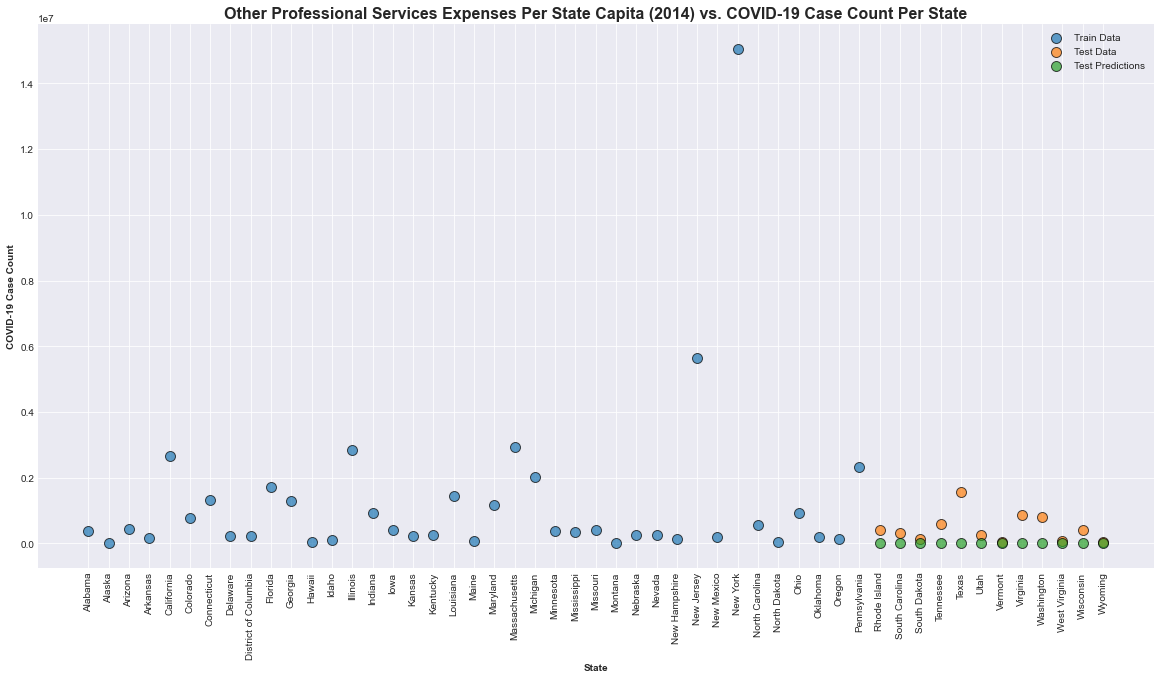

In [60]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Other Professional Services Expenses Per State Capita (2014) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [61]:
features_list = ['Home Health Care Expenses Per State Capita (2014)']
    
target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

RandomForestModel = RandomForestRegressor()
RandomForestModel.fit(X_train_scaled, y_train_scaled)

train_predictions = RandomForestModel.predict(X_train_scaled)
test_predictions = RandomForestModel.predict(X_test_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 451533.2581055206
MSE Value: 387746862168.46313
RMS Value: 622693.2327948194
R2 Score: -1.1088719985759967


<ipython-input-61-d37e44fc3b67>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestModel.fit(X_train_scaled, y_train_scaled)


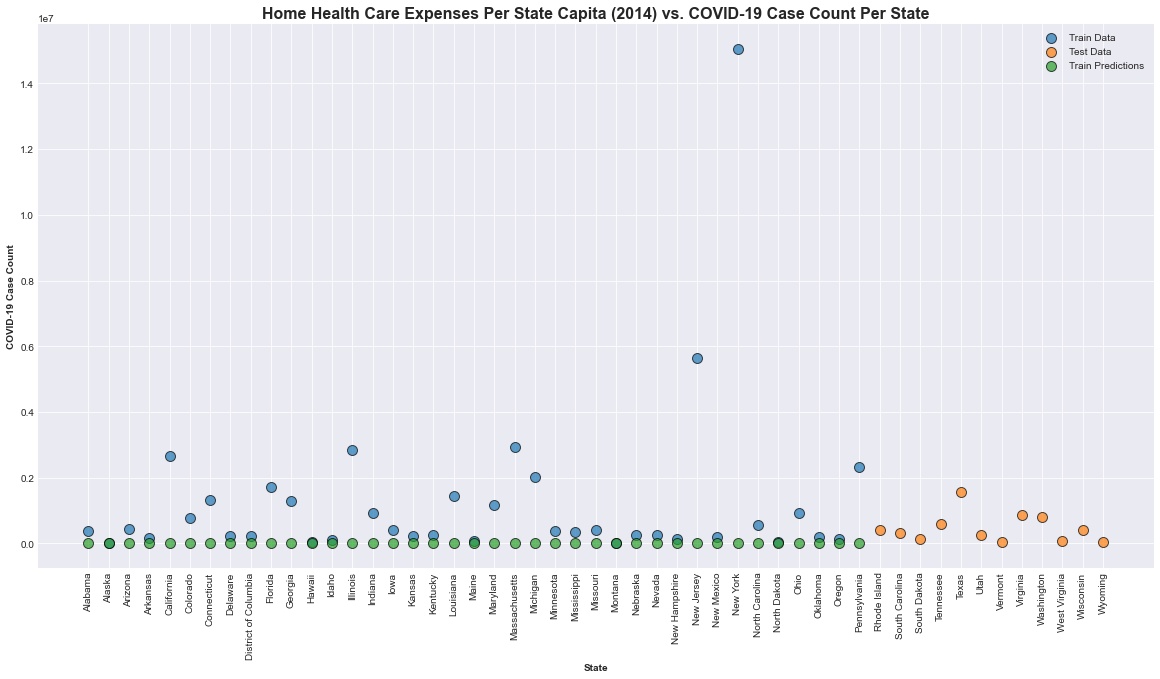

In [62]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Home Health Care Expenses Per State Capita (2014) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

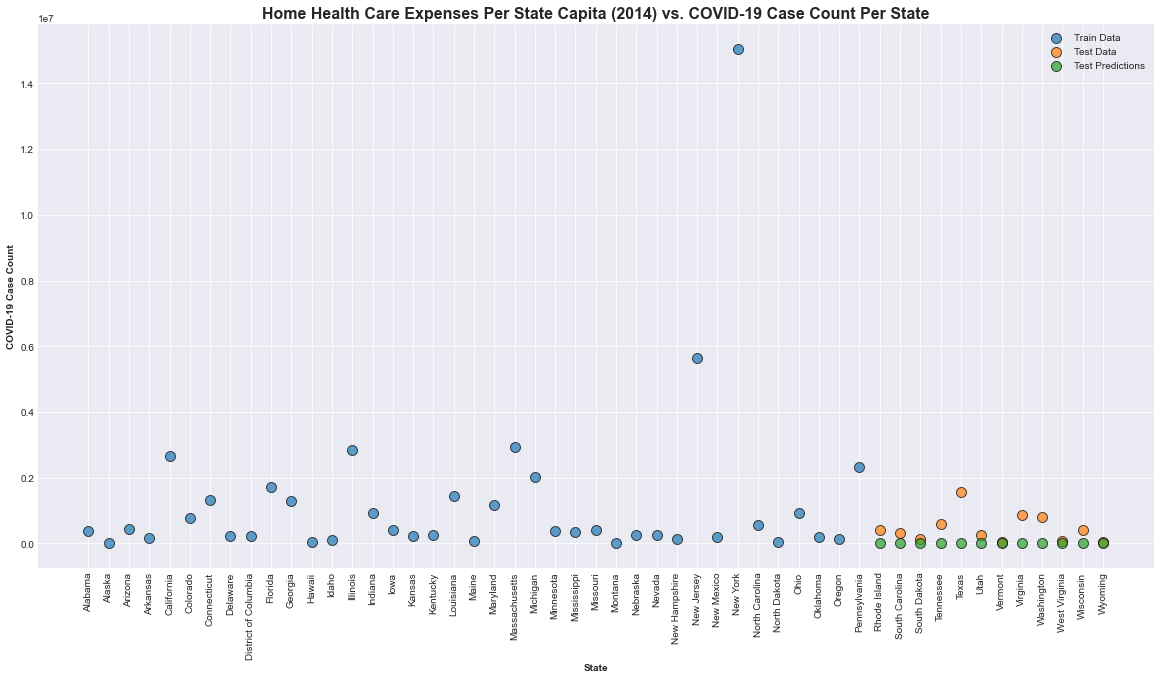

In [63]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Home Health Care Expenses Per State Capita (2014) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [64]:
features_list = ['Drugs and Non-Durables Expenses Per State Capita (2014)']
    
target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

RandomForestModel = RandomForestRegressor()
RandomForestModel.fit(X_train_scaled, y_train_scaled)

train_predictions = RandomForestModel.predict(X_train_scaled)
test_predictions = RandomForestModel.predict(X_test_scaled)


MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 451532.5647209038
MSE Value: 387746235996.5135
RMS Value: 622692.7300013334
R2 Score: -1.1088685929610977


<ipython-input-64-019c9319c9de>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestModel.fit(X_train_scaled, y_train_scaled)


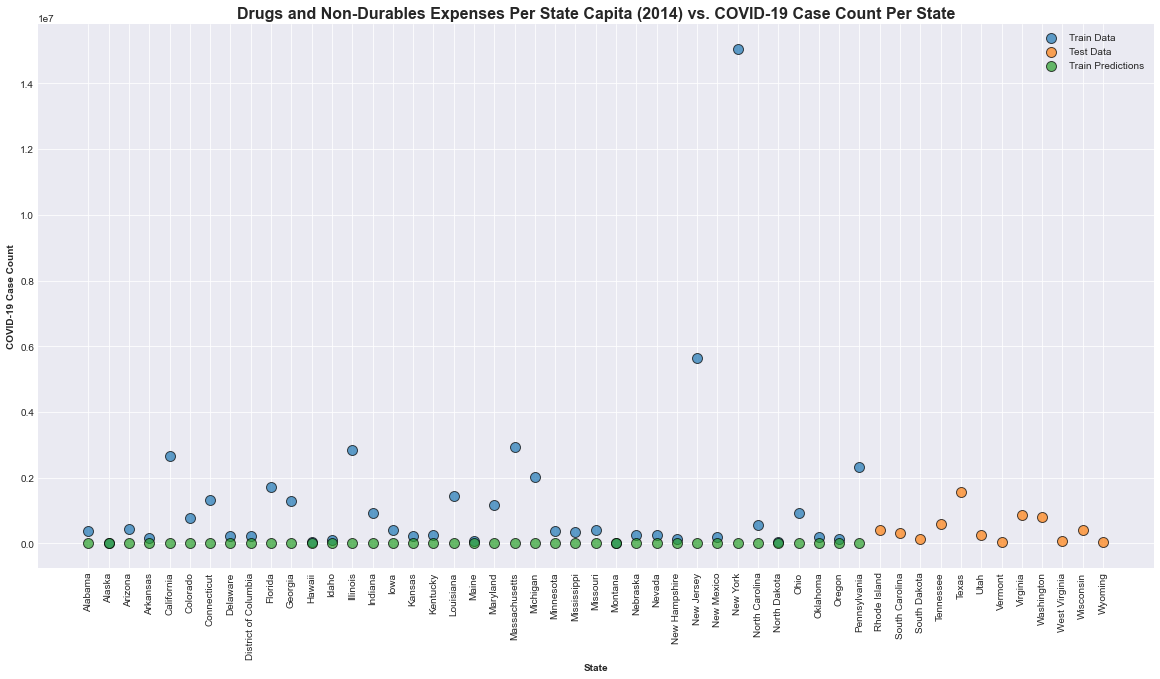

In [65]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Drugs and Non-Durables Expenses Per State Capita (2014) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

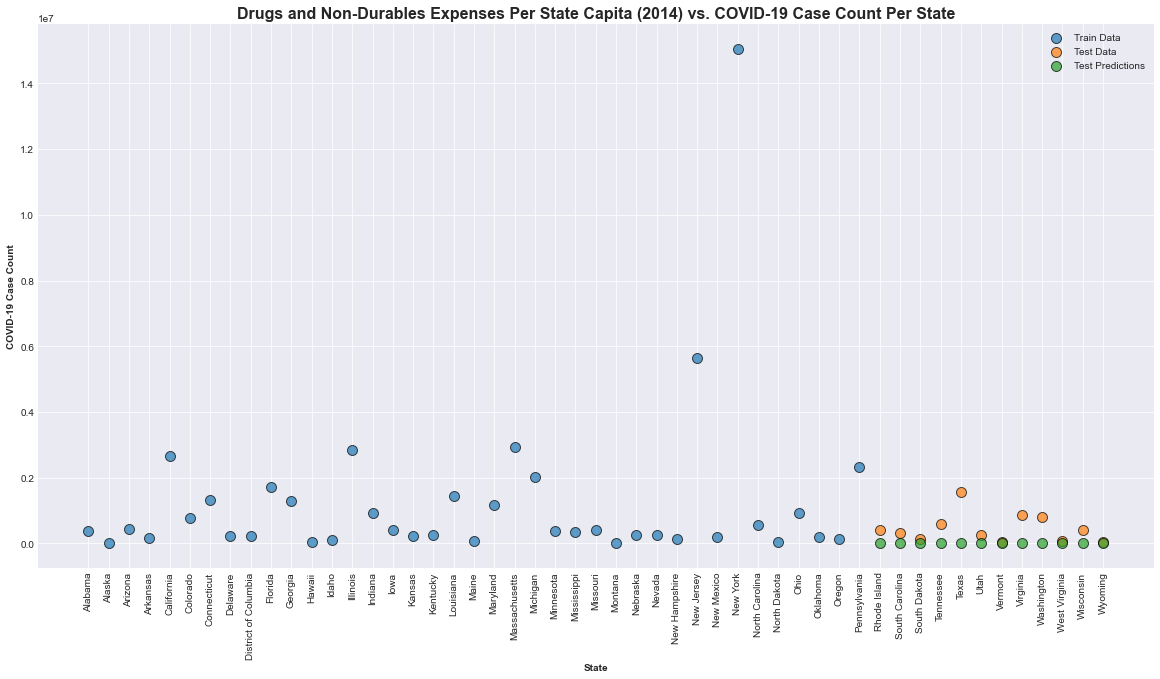

In [66]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Drugs and Non-Durables Expenses Per State Capita (2014) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [67]:
features_list = ['Durables Expenses Per State Capita (2014)']
    
target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

RandomForestModel = RandomForestRegressor()
RandomForestModel.fit(X_train_scaled, y_train_scaled)

train_predictions = RandomForestModel.predict(X_train_scaled)
test_predictions = RandomForestModel.predict(X_test_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 451533.29962443426
MSE Value: 387746899662.8056
RMS Value: 622693.2629014109
R2 Score: -1.1088722024996818


<ipython-input-67-ffc63c08a9e7>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestModel.fit(X_train_scaled, y_train_scaled)


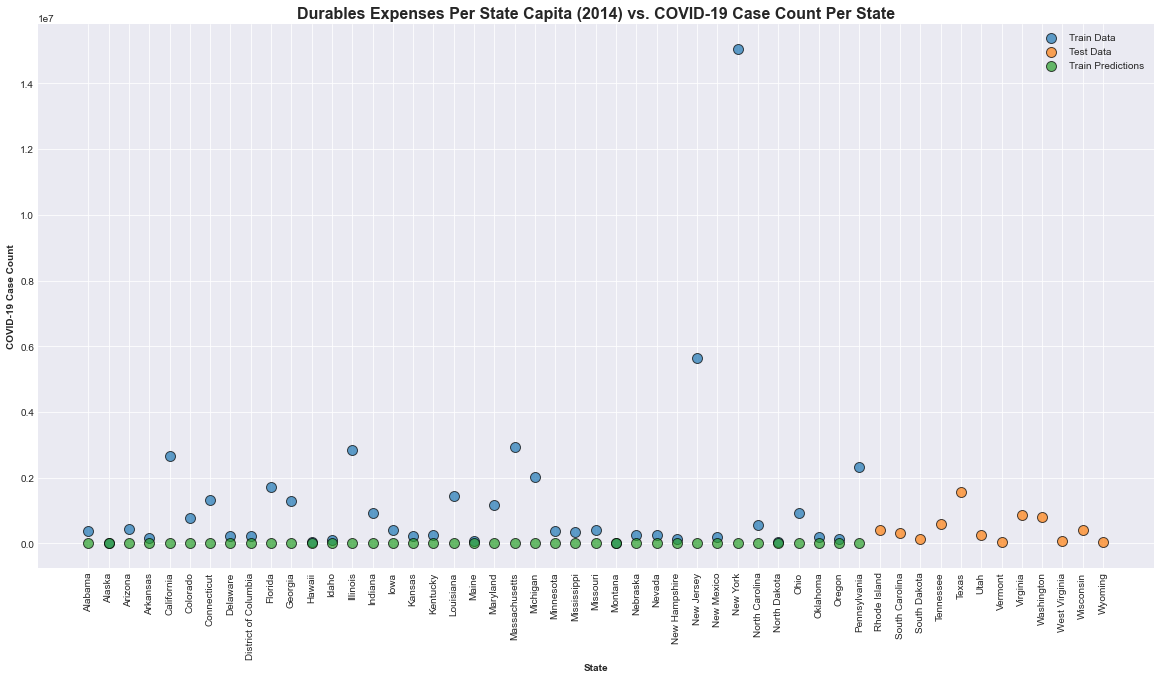

In [68]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Durables Expenses Per State Capita (2014) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

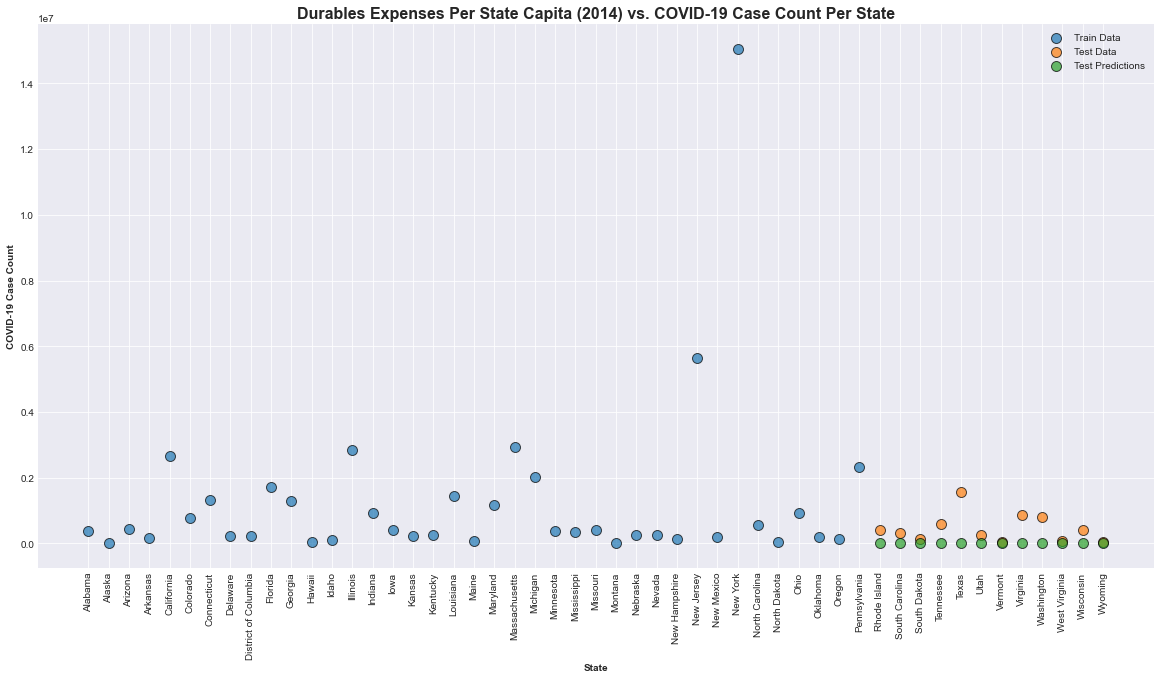

In [69]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Durables Expenses Per State Capita (2014) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [70]:
features_list = ['Other Health Care Expenses Per State Capita (2014)']
    
target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

RandomForestModel = RandomForestRegressor()
RandomForestModel.fit(X_train_scaled, y_train_scaled)

train_predictions = RandomForestModel.predict(X_train_scaled)
test_predictions = RandomForestModel.predict(X_test_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 451533.2652323895
MSE Value: 387746868604.4997
RMS Value: 622693.2379627224
R2 Score: -1.108872033580219


<ipython-input-70-8b90e940599c>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestModel.fit(X_train_scaled, y_train_scaled)


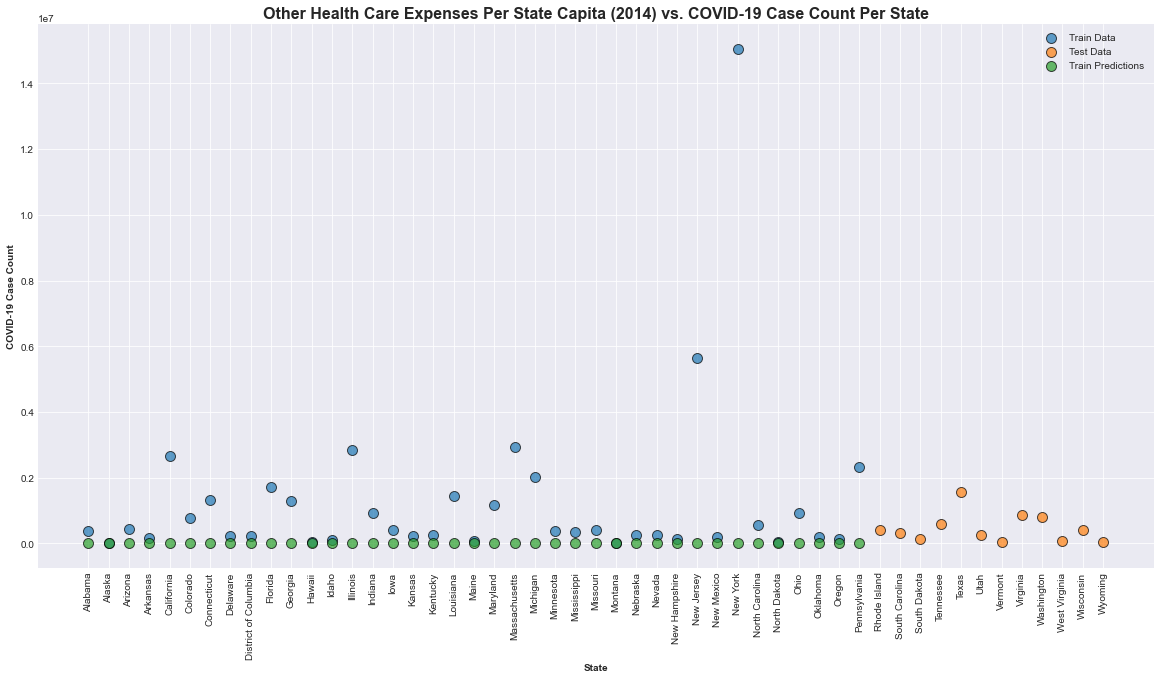

In [71]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Other Health Care Expenses Per State Capita (2014) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

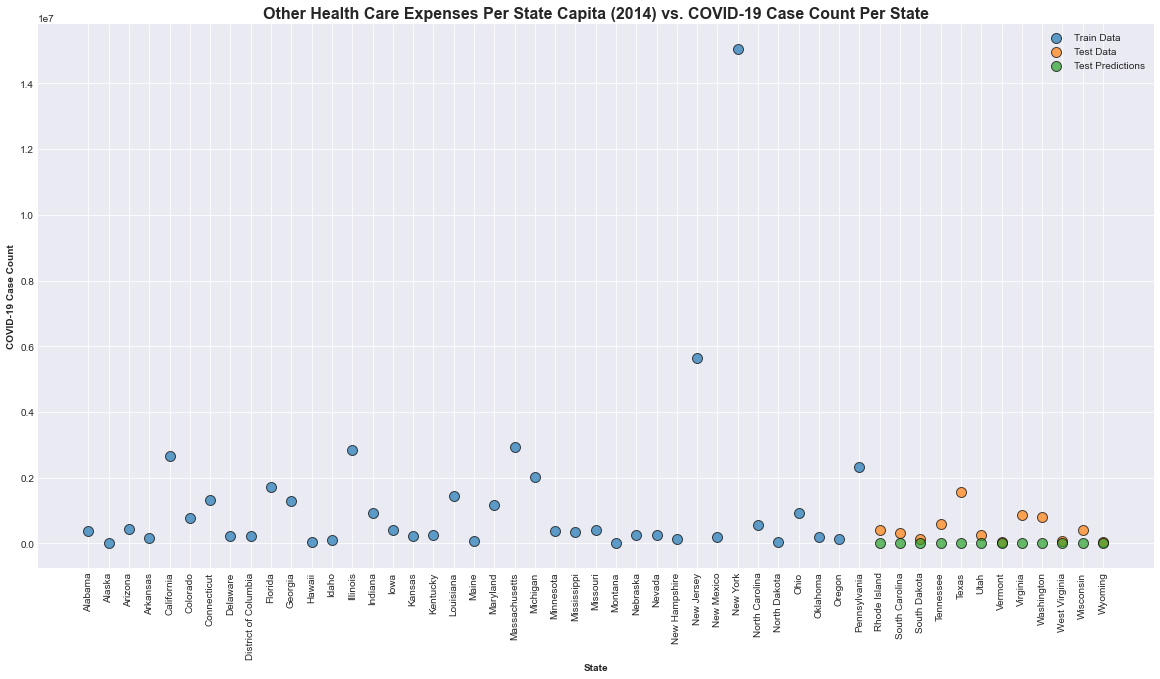

In [72]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Other Health Care Expenses Per State Capita (2014) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [77]:
features_list = ['Personal Health Care Expenses Per State Capita (2014)', 'Hospital Services Expenses Per State Capita (2014)', 'Physician and Clinical Services Expenses Per State Capita (2014)', 
           'Other Professional Services Expenses Per State Capita (2014)', 'Home Health Care Expenses Per State Capita (2014)', 
           'Drugs and Non-Durables Expenses Per State Capita (2014)', 'Durables Expenses Per State Capita (2014)', 
           'Other Health Care Expenses Per State Capita (2014)']
    
target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform((X_train))
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
X_test_scaled = scaler.transform(X_test)

RandomForestModel = RandomForestRegressor()
RandomForestModel.fit(X_train_scaled, y_train_scaled)

train_predictions = RandomForestModel.predict(X_train_scaled)
test_predictions = RandomForestModel.predict(X_test_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 451533.2703161179
MSE Value: 387746873195.4448
RMS Value: 622693.2416490843
R2 Score: -1.1088720585493848


<ipython-input-77-6ebd96229ff5>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestModel.fit(X_train_scaled, y_train_scaled)


In [80]:
features_list = ['Personal Health Care Expenses Per State Capita (2014)', 'Hospital Services Expenses Per State Capita (2014)', 'Physician and Clinical Services Expenses Per State Capita (2014)', 
           'Other Professional Services Expenses Per State Capita (2014)', 'Home Health Care Expenses Per State Capita (2014)', 
           'Drugs and Non-Durables Expenses Per State Capita (2014)', 'Durables Expenses Per State Capita (2014)', 
           'Other Health Care Expenses Per State Capita (2014)']
    
target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform((X_train))
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
X_test_scaled = scaler.transform(X_test)

RandomForestModel = RandomForestRegressor()
RandomForestModel.fit(X_train_scaled, y_train_scaled)

train_predictions_scaled = RandomForestModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = RandomForestModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 316346.4166666667
MSE Value: 187291842913.1991
RMS Value: 432772.276045034
R2 Score: -0.018640153198032916


<ipython-input-80-f0e283771cdc>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestModel.fit(X_train_scaled, y_train_scaled)


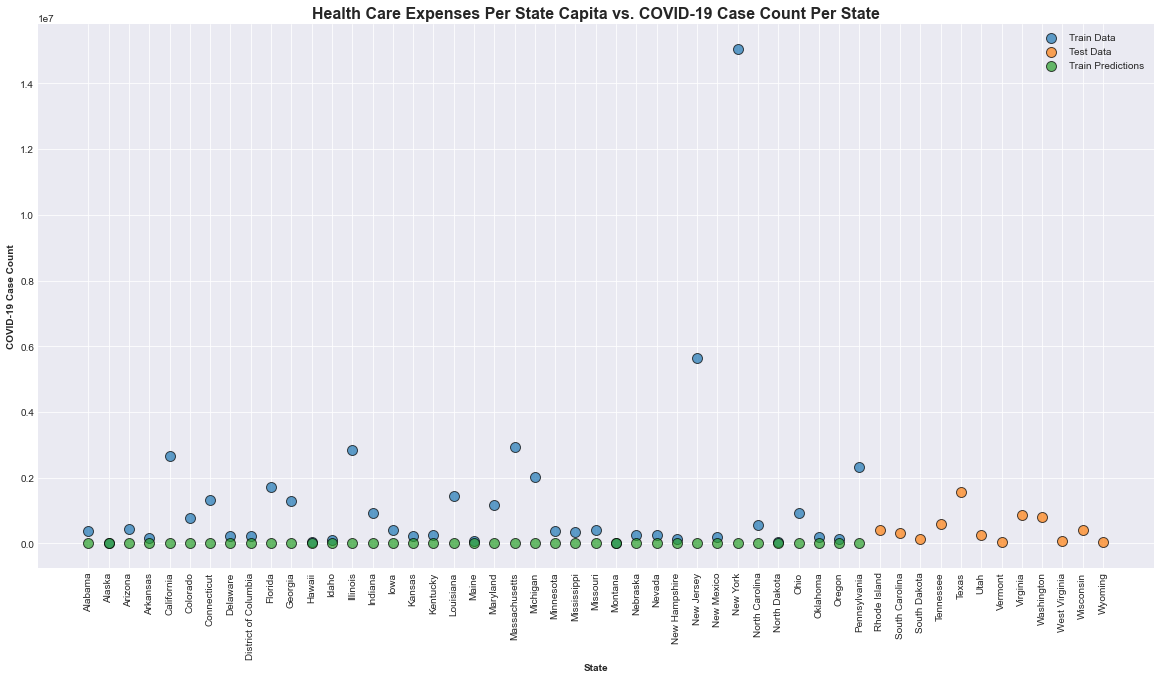

In [74]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Health Care Expenses Per State Capita vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

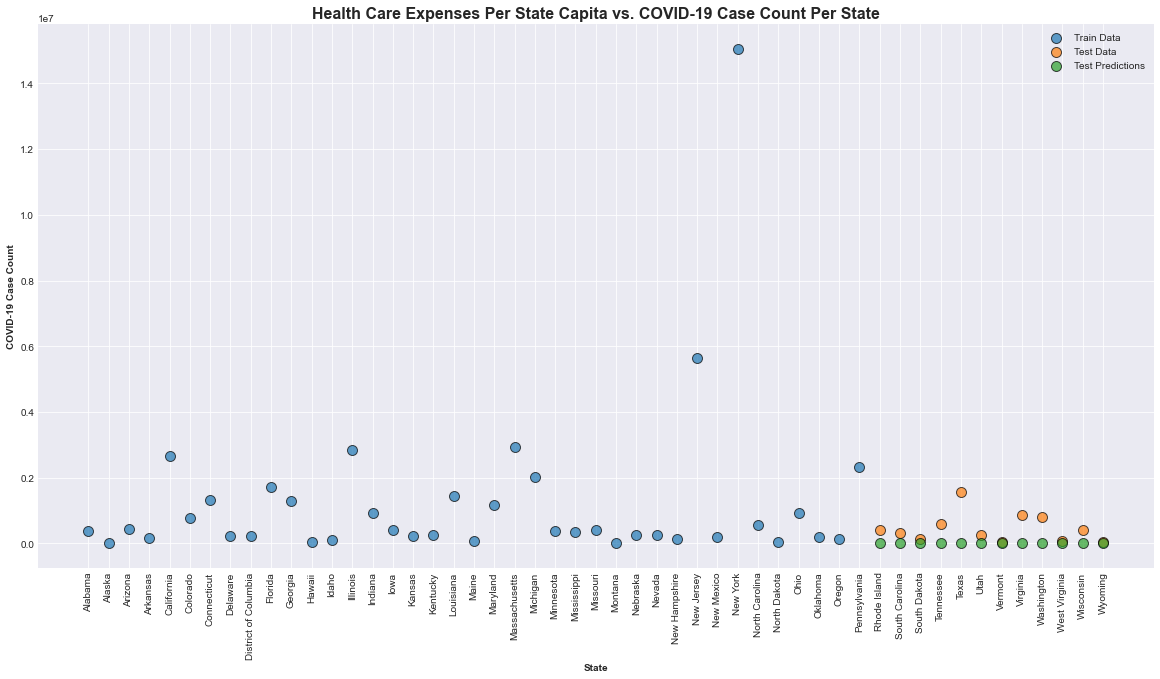

In [75]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Health Care Expenses Per State Capita vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();